In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Deberá seleccionar un dataset que considere adecuado para 
constuir un modelo de clasificación que contenga al menos 15 
variables mas la variable a predecir, es decir 16 variables.
Adicionalmente el dataset debe contener al menos 500 filas para que 
todo el proceso que se desarrollará funciona adecuadamente. El 
dataset debe puede ser algo de su trabajo o un dataset público 
(Kaggle por ejemplo).

El dataset es una base de datos de OpenPowerlifting a enero de 2024, descargado en formato csv en Kaggle, el cual detalla el levantamiento de pesas, por el cual se carga para el presente proyecto.

## Carga del Dataset

In [143]:
dataopen = pd.read_csv("openpowerlifting1.csv")
dataopen.head()

,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,Angie Belk Terry,F,Wraps,47,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,Dawn Bogart,F,Single-ply,42,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,Dawn Bogart,F,Single-ply,42,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
3,Dawn Bogart,F,Raw,42,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29
4,Destiny Dula,F,Raw,18,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47


Notamos que hay varias columna que tiene datos faltantes o nulos, por lo que servirá para proceder a identificar la escala de cada una. Es decir, clasificaremos entre variables categóricas, continuas y discretas.

# 2. Análisis Exploratorio del dataset: 
Debe realizarlo para todo el dataset elegido, mostrando información relevante. Mostrar resultados y gráficas.

In [144]:
dataopen.shape

(435, 16)

El presente Dataset contiene 386,414 filas y 17 columnas, por que cumple con los requisitos del data set para el presente proyecto

In [145]:
dataopen.dtypes

Name               object
Sex                object
Equipment          object
Age                 int64
Division           object
BodyweightKg      float64
WeightClassKg      object
Squat4Kg          float64
BestSquatKg       float64
Bench4Kg          float64
BestBenchKg       float64
Deadlift4Kg       float64
BestDeadliftKg    float64
TotalKg           float64
Place              object
Wilks             float64
dtype: object

Para el presente caso, se tiene datos enteros, decimales y flotantes.

In [146]:
dataopen.describe()

,Age,BodyweightKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Wilks
count,435.000000,435.000000,7.000000,255.000000,3.000000,407.000000,8.000000,338.00000,422.000000,422.000000
mean,34.172414,91.851931,47.780000,193.145333,-216.213333,144.357912,-47.521250,213.69645,423.668057,291.186872
std,12.461745,21.385345,237.183843,69.702072,9.168322,53.599781,263.402479,63.19763,202.702698,122.293740
min,15.000000,48.990000,-219.990000,47.630000,-226.800000,20.410000,-317.510000,70.31000,40.000000,48.890000
25%,24.000000,74.885000,-183.700000,136.080000,-218.860000,105.795000,-305.000000,157.50000,235.000000,173.527500
50%,30.000000,89.810000,176.900000,185.000000,-210.920000,149.690000,-64.640000,226.80000,415.000000,297.845000
75%,44.000000,99.790000,188.770000,239.070000,-210.920000,176.900000,201.030000,260.61500,586.832500,392.047500
max,66.000000,173.910000,367.410000,455.860000,-210.920000,288.030000,272.500000,374.21000,1059.140000,627.860000


Imputación de Datos Faltantes

#### Verificamos porcentaje faltantes por columna

In [147]:
dataopen.isnull().mean()

Name              0.000000
Sex               0.000000
Equipment         0.000000
Age               0.000000
Division          0.000000
BodyweightKg      0.000000
WeightClassKg     0.000000
Squat4Kg          0.983908
BestSquatKg       0.413793
Bench4Kg          0.993103
BestBenchKg       0.064368
Deadlift4Kg       0.981609
BestDeadliftKg    0.222989
TotalKg           0.029885
Place             0.000000
Wilks             0.029885
dtype: float64

Por lo anterior detallado se procede a identificar la escala de cada una. Es decir, clasificaremos entre variables categóricas, continuas y discretas.

In [148]:
categoricas = [col for col in dataopen.columns if(dataopen[col].dtypes == 'object')]
categoricas

['Name', 'Sex', 'Equipment', 'Division', 'WeightClassKg', 'Place']

In [149]:
dataopen[categoricas]

,Name,Sex,Equipment,Division,WeightClassKg,Place
0,Angie Belk Terry,F,Wraps,Mst 45-49,60,1
1,Dawn Bogart,F,Single-ply,Mst 40-44,60,1
2,Dawn Bogart,F,Single-ply,Open Senior,60,1
3,Dawn Bogart,F,Raw,Open Senior,60,1
4,Destiny Dula,F,Raw,Teen 18-19,67.5,1
...,...,...,...,...,...,...
430,Michael Dudley,M,Raw,Open,100,1
431,Jeff Beckham,M,Raw,M-2,100,1
432,Michael Dudley,M,Raw,Open,100,1
433,Jeff Beckham,M,Raw,M-2,100,1


In [150]:
# Porcentajes de N'AS O NULLS 
cols_datos_faltantes=[col for col in dataopen.columns if dataopen[col].isnull().mean()>0]
cols_datos_faltantes

['Squat4Kg',
 'BestSquatKg',
 'Bench4Kg',
 'BestBenchKg',
 'Deadlift4Kg',
 'BestDeadliftKg',
 'TotalKg',
 'Wilks']

In [151]:
dataopen[cols_datos_faltantes]

,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Wilks
0,NaN,47.63,NaN,20.41,NaN,70.31,138.35,155.05
1,NaN,142.88,NaN,95.25,NaN,163.29,401.42,456.38
2,NaN,142.88,NaN,95.25,NaN,163.29,401.42,456.38
3,NaN,NaN,NaN,95.25,NaN,NaN,95.25,108.29
4,NaN,NaN,NaN,31.75,NaN,90.72,122.47,130.47
...,...,...,...,...,...,...,...,...
430,NaN,NaN,NaN,235.00,NaN,NaN,235.00,144.16
431,NaN,NaN,NaN,175.00,NaN,257.50,432.50,263.72
432,NaN,NaN,NaN,235.00,NaN,NaN,235.00,144.16
433,NaN,NaN,NaN,175.00,NaN,257.50,432.50,263.72


En este caso se denota las columnas con faltantes, siendo estos en 13 columnas, tales como: Age, Squt4Kg, Bench4Kg, BestBenchKg, Deadlift4Kg, BestDealdiftKg, entre otros.

# 3. Selección de Variables:
# 3. a. Variable a predecir: tipo categórico
Para el presente proyecto se consideró la variable o columna "Place" como predictora, en virtud de se quiere saber si la posición (place) en la que terminó el atleta, se ve influida la edad, el sexo, equipo entre otras. Por lo que se establece también las variables continuas y discretas si hubieran en el dataset.

In [152]:
continuas = [col for col in dataopen.columns if((dataopen[col].dtypes in ['int64', 'float64']) and len(dataopen[col].unique()) > 30)]
continuas

['Age',
 'BodyweightKg',
 'BestSquatKg',
 'BestBenchKg',
 'BestDeadliftKg',
 'TotalKg',
 'Wilks']

In [153]:
discretas = [col for col in dataopen.columns if((dataopen[col].dtypes in ['int64', 'float64']) and len(dataopen[col].unique()) <= 30)]
discretas

['Squat4Kg', 'Bench4Kg', 'Deadlift4Kg']

b. Variables predictoras: variables que considere esenciales. Dado lo establecido anteriormente, las variables a predecir son las establecidas como continuas, en el cual se sabe que no hay existencia de variables discretas en la base de datos.

#### 4. Imputación de variables numéricas continuas:
4.1 En esta parte se detecta el porcentaje de faltantes en la variables numéricas continuas y se seleccionan aquellas variables que tiene valores faltantes

In [154]:
continuas_con_na = [col for col in continuas if dataopen[col].isnull().mean() > 0]
dataopen[continuas_con_na].isnull().mean()

BestSquatKg       0.413793
BestBenchKg       0.064368
BestDeadliftKg    0.222989
TotalKg           0.029885
Wilks             0.029885
dtype: float64

Dado que existen nueve variables tiene un porcentaje de nulos que superan el 5%, será necesario realizar un análisis particular para cada caso 

### 4.i.1 Análisis para Variable Age

In [155]:
dataopen['Age'].mean()

34.172413793103445

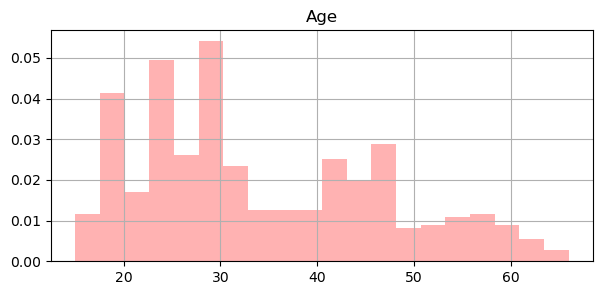

In [156]:
fig = plt.figure(figsize=(7, 3))
dataopen['Age'].hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Age')
plt.show()

En esta caso, se revisará el impacto de la media y mediana al momento al realizar la imputación

##### Imputación por Media y Mediana

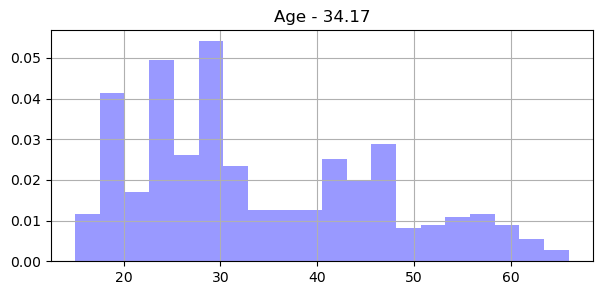

In [157]:
mean_Age = round(dataopen['Age'].mean(), 2)

temp_series = dataopen['Age'].fillna(mean_Age)

fig = plt.figure(figsize=(7, 3))
temp_series.hist(bins=20, density=True, color='blue', alpha=0.4)
plt.title('Age - ' + str(mean_Age))
plt.show()

En este caso notamos que la imputación de la media genera un impacto menor dado que la media es 34.17 por lo que aparece una acumulación de valores entre el bin de 30 a 80 aproximadamente por lo que su valor no aportaría al modelo. Veremos si la imputación por mediana mejore

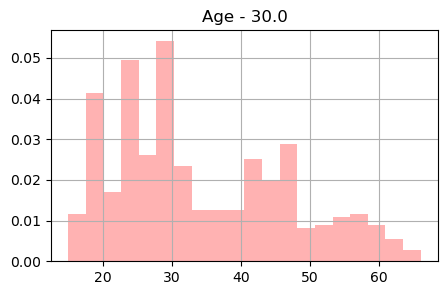

In [158]:
median_Age = round(dataopen['Age'].median(), 2)

temp_series = dataopen['Age'].fillna(median_Age)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Age - ' + str(median_Age))
plt.show()

Imputación:

In [159]:
dataopen['Age'].fillna(median_Age, inplace=True)

En este caso notamos que un impacto mínimo es poca en la imputación por mediana la variable Age por se utilizará la mediana para imputar la variable Age

##### 4.i.2 Análisis para Variable BodyweightKg 

In [160]:
dataopen['BodyweightKg'].mean()

91.85193103448275

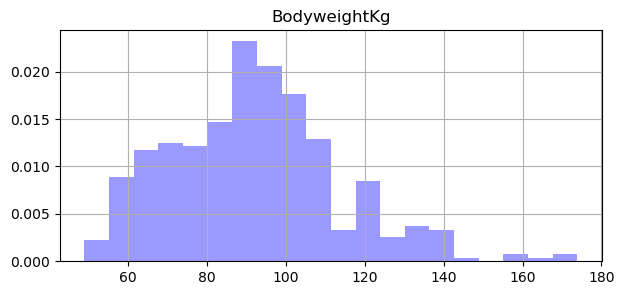

In [161]:
fig = plt.figure(figsize=(7, 3))
dataopen['BodyweightKg'].hist(bins=20, density=True, color='blue', alpha=0.4)
plt.title('BodyweightKg')
plt.show()

##### Imputación por Media y Mediana

En esta caso, revisaremos el impacto de la media y mediana al momento al realizar la imputación

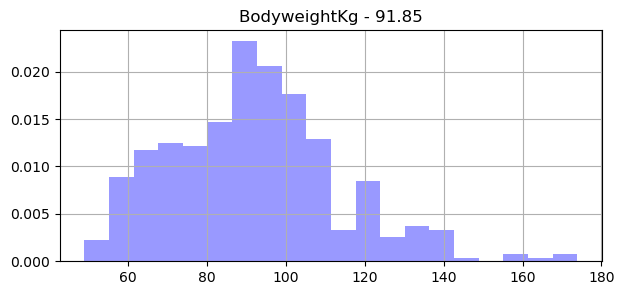

In [162]:
mean_BodyweightKg = round(dataopen['BodyweightKg'].mean(), 2)

temp_series = dataopen['BodyweightKg'].fillna(mean_BodyweightKg)

fig = plt.figure(figsize=(7, 3))
temp_series.hist(bins=20, density=True, color='blue', alpha=0.4)
plt.title('BodyweightKg - ' + str(mean_BodyweightKg))
plt.show()

Imputación:

En este caso se nota que la imputación de la media genera un impacto mayor derivado que la media es del 91.85 por lo que aparece una acumulación de valores en el bin de 100 al 175 por lo que deforma significativamente la distribución original. Por lo que al imputar por mediana mejore.

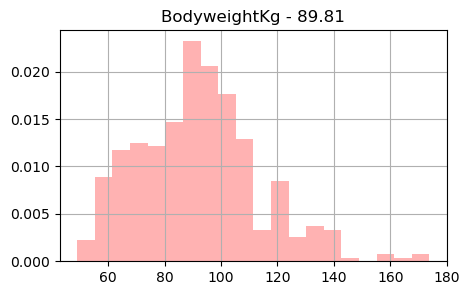

In [163]:
median_BodyweightKg = round(dataopen['BodyweightKg'].median(), 2)

temp_series = dataopen['BodyweightKg'].fillna(median_BodyweightKg)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('BodyweightKg - ' + str(median_BodyweightKg))
plt.show()

In [164]:
dataopen['BodyweightKg'].fillna(median_BodyweightKg , inplace=True)

En el caso de imputar notamos que un impacto mínimo en la imputación por mediana utilizaremos imputación por mediana para imputar la variable BodyweightKg

##### 4.i.3 Análisis para Variable Squat4Kg  

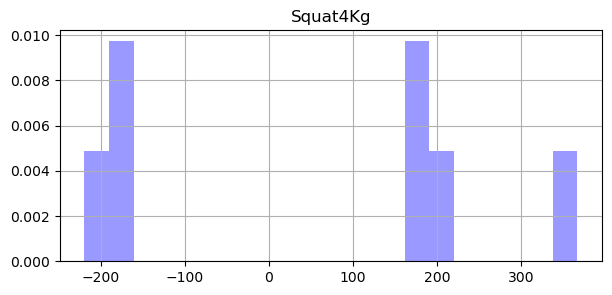

In [165]:
fig = plt.figure(figsize=(7, 3))
dataopen['Squat4Kg'].hist(bins=20, density=True, color='blue', alpha=0.4)
plt.title('Squat4Kg')
plt.show()

En este caso, por existir valores negativos y positivos, se procede a calcular el valor de la media.

In [166]:
dataopen['Squat4Kg'].mean()

47.78000000000001

En virtud que la variable tiene un porcentaje muy alto de faltantes y en algunos casos posee valores negativos, se decide eliminar la variable/columna Squat4Kg dado que cualquier valor que se decida imputar, generará una deformación grande en la estructura de la distribución. 


Eliminación de variable Squat4Kg

In [167]:
dataopen.drop('Squat4Kg', axis=1, inplace=True)

##### 4.i.3 Análisis para Variable MeetID (ya no existe)

En este caso la variable MeetID, tiene un porcentaje muy alto de faltantes, por tanto, se decide eliminar la variable/columna MeetID dado que cualquier valor que se decida imputar, generará una deformación grande en la estructura de la distribución. 

##### 4.i.4 Análisis para Variable BestSquatKg

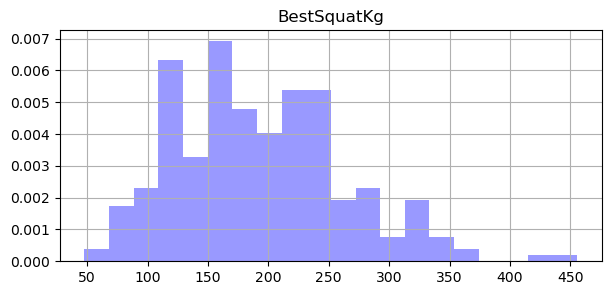

In [168]:
fig = plt.figure(figsize=(7, 3))
dataopen['BestSquatKg'].hist(bins=20, density=True, color='blue', alpha=0.4)
plt.title('BestSquatKg')
plt.show()

In [169]:
dataopen['BestSquatKg'].mean()

193.14533333333333

En este caso la variable BestSquatKg, según la media se tiene un porcentaje alto de faltantes, pero los valores se encuentran entre los bines 400 a 450, por tanto, es necesario analizar más a detalle por lo que se procede a imputar por la media y mediana para establecer si mejora el resultado.

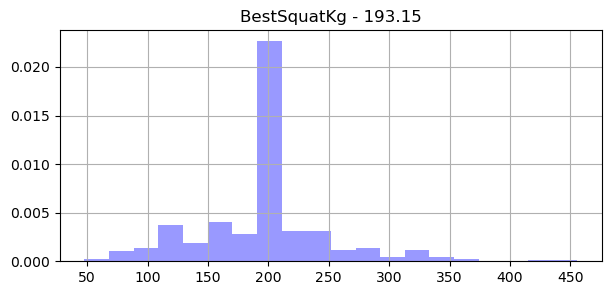

In [170]:
mean_BestSquatKg = round(dataopen['BestSquatKg'].mean(), 2)

temp_series = dataopen['BestSquatKg'].fillna(mean_BestSquatKg)

fig = plt.figure(figsize=(7, 3))
temp_series.hist(bins=20, density=True, color='blue', alpha=0.4)
plt.title('BestSquatKg - ' + str(mean_BestSquatKg))
plt.show()

Según el análisis anteriore, el sesgo de la variable es grande que al imputar la media el valor resultanto impacta mínimamente la estructura de la variable por lo que procedió a analizar por la mediana para ver si mejora el resultado.

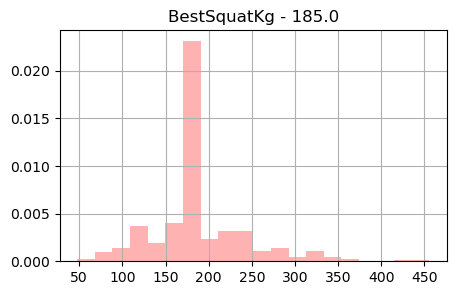

In [171]:
median_BestSquatKg = round(dataopen['BestSquatKg'].median(), 2)

temp_series = dataopen['BestSquatKg'].fillna(median_BestSquatKg)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('BestSquatKg - ' + str(median_BestSquatKg))
plt.show()

Como lo habíamos comentado anteriormente, el sesgo de la variable es tal que al imputar la media el valor resultanto impacta mínimamente la estructura de la variable por lo que se realizará la imputación por mediana.

In [172]:
dataopen['BestSquatKg'].fillna(median_BestSquatKg, inplace=True)

##### 4.i.5 Análisis para Variable Bench4Kg 

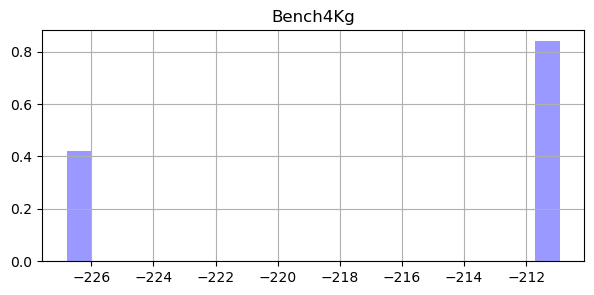

In [173]:
fig = plt.figure(figsize=(7, 3))
dataopen['Bench4Kg'].hist(bins=20, density=True, color='blue', alpha=0.4)
plt.title('Bench4Kg')
plt.show()

En este caso, por existir valores negativos y positivos, se procede a calcular el valor de la media.

In [174]:
dataopen['Bench4Kg'].mean()

-216.21333333333334

En virtud que la variable tiene un porcentaje bajo de faltantes, lo anterior puede ser resultado de que posee datos negativos como positivos, podría inferir o segarse nuestros resultado, por tanto, se decide eliminar la variable/columna Bench4Kg dado que cualquier valor que se decida imputar, generará una deformación grande en la estructura de la distribución. 

Eliminación de la variable Bench4Kg

In [175]:
dataopen.drop('Bench4Kg', axis=1, inplace=True)

### 4.i.6 Análisis para Variable BestBenchKg

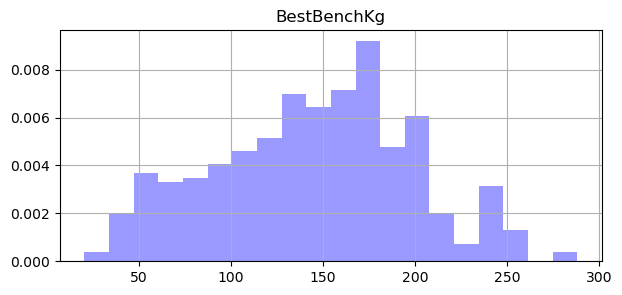

In [176]:
fig = plt.figure(figsize=(7, 3))
dataopen['BestBenchKg'].hist(bins=20, density=True, color='blue', alpha=0.4)
plt.title('BestBenchKg')
plt.show()

In [177]:
dataopen['BestBenchKg'].mean()

144.35791154791156

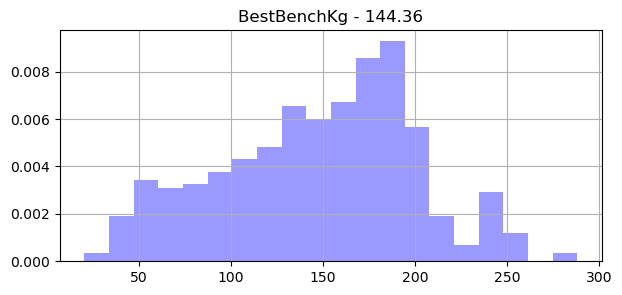

In [178]:
mean_BestBenchKg= round(dataopen['BestBenchKg'].mean(), 2)

temp_series = dataopen['BestBenchKg'].fillna(mean_BestSquatKg)

fig = plt.figure(figsize=(7, 3))
temp_series.hist(bins=20, density=True, color='blue', alpha=0.4)
plt.title('BestBenchKg - ' + str(mean_BestBenchKg))
plt.show()

En este caso se nota que la imputación de la media genera un impacto mayor derivado que la media es del 144.36 por lo que aparece una acumulación de valores en el bin de 200 al 400 por lo que deforma significativamente la distribución original. Por lo que al imputar por mediana podria mejorar el resultado.

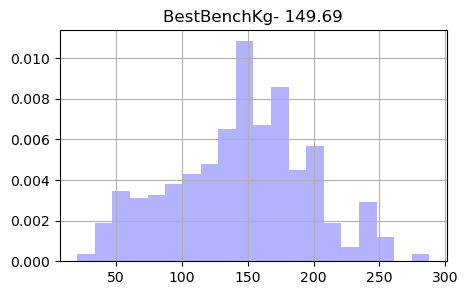

In [179]:
median_BestBenchKg = round(dataopen['BestBenchKg'].median(), 2)

temp_series = dataopen['BestBenchKg'].fillna(median_BestBenchKg)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='blue', alpha=0.3)
plt.title('BestBenchKg- ' + str(median_BestBenchKg))
plt.show()

En relación con la imputación por media, al imputar por la mediana mejora el resultado, por lo que se decide imputar por la media.

Imputación por media

In [180]:
dataopen['BestBenchKg'].fillna(mean_BestSquatKg, inplace=True)

### 4.i.7 Análisis para Variable Deadlift4Kg

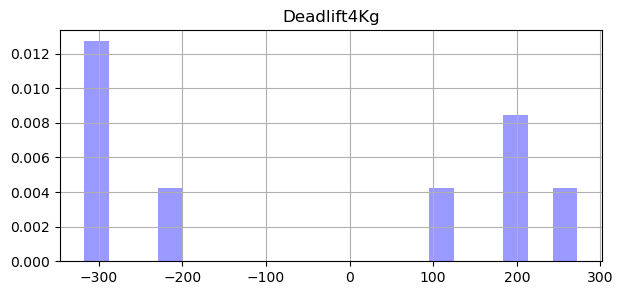

In [181]:
fig = plt.figure(figsize=(7, 3))
dataopen['Deadlift4Kg'].hist(bins=20, density=True, color='blue', alpha=0.4)
plt.title('Deadlift4Kg')
plt.show()

En este caso, por existir valores negativos y positivos, se procede a calcular el valor de la media.

In [182]:
dataopen['Deadlift4Kg'].mean()

-47.52125

En virtud que la variable tiene un porcentaje alto de faltantes, adicionalmente que posee datos negativos como positivos, podría inferir o segarse nuestros resultado, por tanto, se decide eliminar la variable/columna Deadlift4Kg dado que cualquier valor que se decida imputar, generará una deformación grande en la estructura de la distribución. 

Eliminación de la variable Deadlift4Kg

In [183]:
dataopen.drop('Deadlift4Kg', axis=1, inplace=True)

### 4.i.7 Análisis para Variable BestDeadliftKg

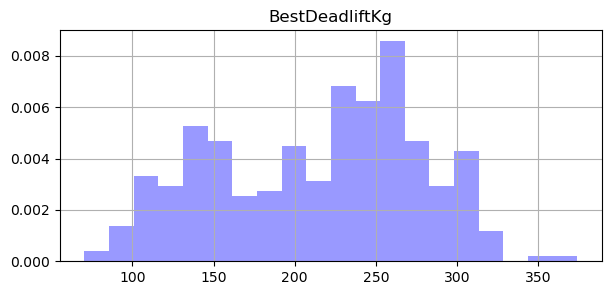

In [184]:
fig = plt.figure(figsize=(7, 3))
dataopen['BestDeadliftKg'].hist(bins=20, density=True, color='blue', alpha=0.4)
plt.title('BestDeadliftKg')
plt.show()

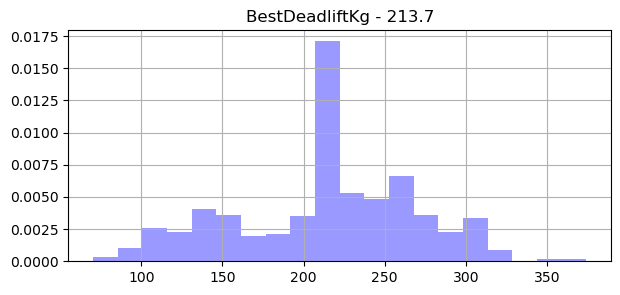

In [185]:
mean_BestDeadliftKg= round(dataopen['BestDeadliftKg'].mean(), 2)

temp_series = dataopen['BestDeadliftKg'].fillna(mean_BestDeadliftKg)

fig = plt.figure(figsize=(7, 3))
temp_series.hist(bins=20, density=True, color='blue', alpha=0.4)
plt.title('BestDeadliftKg - ' + str(mean_BestDeadliftKg))
plt.show()

Para el presente caso el resultado, es muy alto, por lo que se analizará el efecto de imputar por la media, para establecer si mejora el resultado.

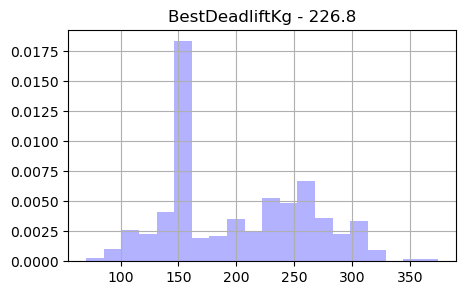

In [186]:
median_BestDeadliftKg = round(dataopen['BestDeadliftKg'].median(), 2)

temp_series = dataopen['BestDeadliftKg'].fillna(median_BestBenchKg)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='blue', alpha=0.3)
plt.title('BestDeadliftKg - ' + str(median_BestDeadliftKg))
plt.show()

De conformidad con los resultados al imputar por la mediana es siempre alto, pero que es mejor con la imputación por la media, por lo que se decide imputar por la media.

Imputación por mediana

In [187]:
dataopen['BestDeadliftKg'].fillna(mean_BestDeadliftKg, inplace=True)

### 4.i.8 Análisis para Variable TotalKg

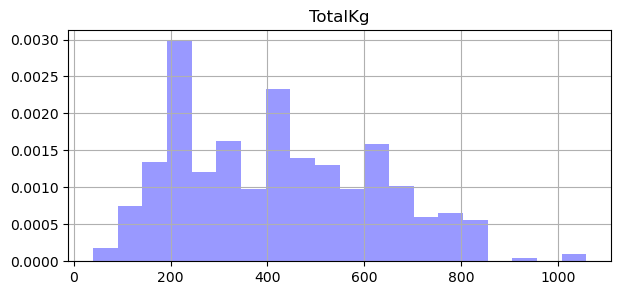

In [188]:
fig = plt.figure(figsize=(7, 3))
dataopen['TotalKg'].hist(bins=20, density=True, color='blue', alpha=0.4)
plt.title('TotalKg')
plt.show()

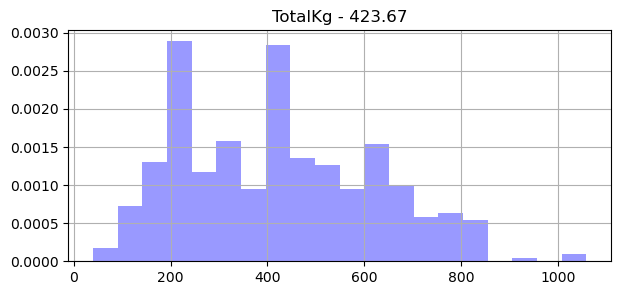

In [189]:
mean_TotalKg= round(dataopen['TotalKg'].mean(), 2)

temp_series = dataopen['TotalKg'].fillna(mean_TotalKg)

fig = plt.figure(figsize=(7, 3))
temp_series.hist(bins=20, density=True, color='blue', alpha=0.4)
plt.title('TotalKg - ' + str(mean_TotalKg))
plt.show()

En relación con la imputación por media, se denota que el resultado es alto, por lo que se analizará si imputar por mediana pueda mejorar el resultado.

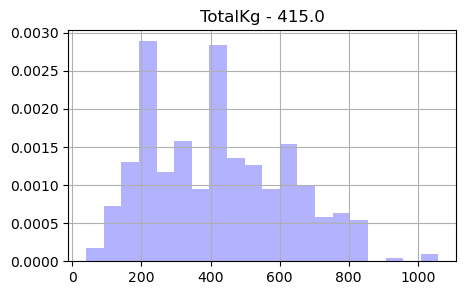

In [190]:
median_TotalKg = round(dataopen['TotalKg'].median(), 2)

temp_series = dataopen['TotalKg'].fillna(median_TotalKg)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='blue', alpha=0.3)
plt.title('TotalKg - ' + str(median_TotalKg))
plt.show()

En relación con la imputación por mediana, el resultado es aun menor que al imputar por la media, por lo que se decide imputar por la mediana.

Imputación por media

In [191]:
dataopen['TotalKg'].fillna(median_TotalKg, inplace=True)

### 4.i.9 Análisis para Variable Wilks 

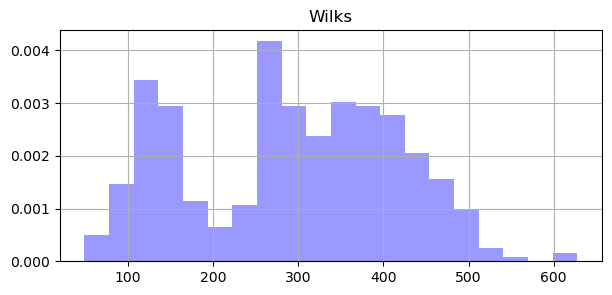

In [192]:
fig = plt.figure(figsize=(7, 3))
dataopen['Wilks'].hist(bins=20, density=True, color='blue', alpha=0.4)
plt.title('Wilks')
plt.show()

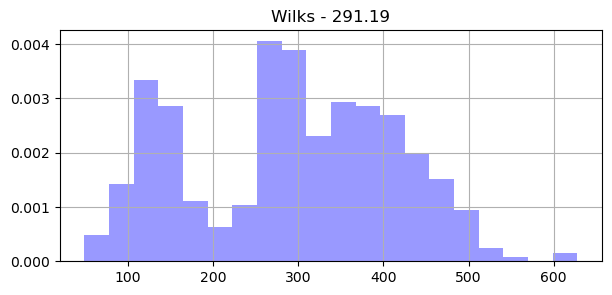

In [193]:
mean_Wilks= round(dataopen['Wilks'].mean(), 2)

temp_series = dataopen['Wilks'].fillna(mean_Wilks)

fig = plt.figure(figsize=(7, 3))
temp_series.hist(bins=20, density=True, color='blue', alpha=0.4)
plt.title('Wilks - ' + str(mean_Wilks))
plt.show()

En relación con la media se denota que es muy alto, por lo que se considera que al imputar por media, el resultado mejore.

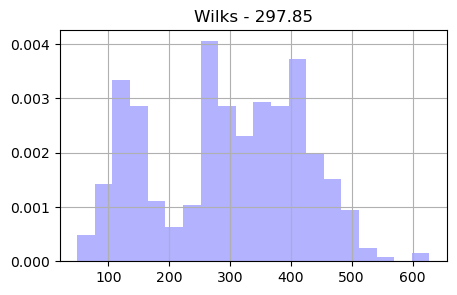

In [194]:
median_Wilks = round(dataopen['Wilks'].median(), 2)

temp_series = dataopen['Wilks'].fillna(median_TotalKg)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='blue', alpha=0.3)
plt.title('Wilks - ' + str(median_Wilks))
plt.show()

En relación con la imputación por media, al imputar por la mediana el resultado es mayor que la media, por lo que se decide imputar por la media.

Imputación por media

In [195]:
dataopen['Wilks'].fillna(mean_Wilks, inplace=True)

#### 4.ii - Imputación de variables numéricas categóricas

In [196]:
categoricas_con_na = [col for col in categoricas if dataopen[col].isnull().mean() > 0]
dataopen[categoricas_con_na].isnull().mean() 

Series([], dtype: float64)

### 4.ii.1 Análisis para Variable División

In [197]:
dataopen['Division'].value_counts().head()

Division
Open           90
Novice         42
Open Senior    31
M-2            19
M-OFRC-U       13
Name: count, dtype: int64

En este caso dado el porcentaje de faltantes en la variable/columna Division se imputó la categoría con mayor frecuencia en la columna, en este caso sería el valor **OPEN**.

In [198]:
dataopen['Division'].fillna('Open', inplace=True)

### 4.ii.2 Análisis para Variable WeightClassKg 

In [199]:
dataopen['WeightClassKg'].value_counts().head()

WeightClassKg
100     98
90      75
75      51
82.5    43
110     37
Name: count, dtype: int64

En este caso dado el porcentaje de faltantes en la variable/columna WeightClassKg se imputó la categoría con mayor frecuencia en la columna, en este caso sería el valor **90**.

In [200]:
dataopen['WeightClassKg'].fillna('90', inplace=True)

### 4.ii.3 Análisis para Variable Place

In [201]:
dataopen['Place'].value_counts().head()

Place
1     359
2      48
DQ     13
3      11
4       3
Name: count, dtype: int64

En este caso dado el porcentaje de faltantes en la variable/columna Place se imputó la categoría con mayor frecuencia en la columna, en este caso sería el valor **1**.

In [202]:
dataopen['Place'].fillna('1', inplace=True)

Para finalizar verificamos el porcentaje de faltantes en todas las columnas nuevamente, para asegurarnos que todos los faltantes se hayan tratado.

In [203]:
pd.DataFrame(dataopen.isnull().mean()).transpose()

,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Place,Wilks
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 4.b. Codificación de Variables Categóricas

Recordemos cuales son las variables categóricas para este dataset.

In [204]:
categoricas

['Name', 'Sex', 'Equipment', 'Division', 'WeightClassKg', 'Place']

Según la naturaleza del data set y debido a que la cantidad de categorías por cada columna puede ser variable, utilizaremos una codificación por frecuencia para las variable categóricas.

In [205]:
for col in categoricas:
       values_for_encode = dataopen[col].value_counts().to_dict()
       dataopen[col] = dataopen[col].map(values_for_encode)

Se validan todas las columnas sean de tipo numéricas.

In [206]:
dataopen.dtypes

Name                int64
Sex                 int64
Equipment           int64
Age                 int64
Division            int64
BodyweightKg      float64
WeightClassKg       int64
BestSquatKg       float64
BestBenchKg       float64
BestDeadliftKg    float64
TotalKg           float64
Place               int64
Wilks             float64
dtype: object

En este caso, todas las variables son de tipo numérico por lo que se ha concluido con la codificación de variables categóricas.

In [207]:
dataopen.head()

,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Place,Wilks
0,1,96,119,47,3,59.60,19,47.63,20.41,70.31,138.35,359,155.05
1,12,96,16,42,7,58.51,19,142.88,95.25,163.29,401.42,359,456.38
2,12,96,16,42,31,58.51,19,142.88,95.25,163.29,401.42,359,456.38
3,12,96,274,42,31,58.51,19,185.00,95.25,213.70,95.25,359,108.29
4,1,96,274,18,3,63.68,31,185.00,31.75,90.72,122.47,359,130.47


#### Escritura de Archivo de Variables a Disco.

In [208]:
dataopen['BodyweightKg'].fillna(median_BodyweightKg, inplace=True)

## Tratamiento de Outliers

Identificación de Variables discretas y continuas

In [209]:
dataopen.dtypes

Name                int64
Sex                 int64
Equipment           int64
Age                 int64
Division            int64
BodyweightKg      float64
WeightClassKg       int64
BestSquatKg       float64
BestBenchKg       float64
BestDeadliftKg    float64
TotalKg           float64
Place               int64
Wilks             float64
dtype: object

In [210]:
# Verificación del tipo de dato numérico y si la cantidad de valores distintos dentro de la columna es mayor que 30
continuas = [col for col in dataopen.columns if(dataopen[col].dtypes in ['float64','int64']) and (len(dataopen[col].unique()) > 30)]
continuas

['Age',
 'BodyweightKg',
 'BestSquatKg',
 'BestBenchKg',
 'BestDeadliftKg',
 'TotalKg',
 'Wilks']

In [211]:
# Importamos seaborn
import seaborn as sns

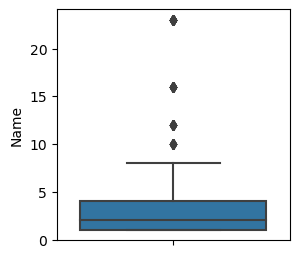

In [212]:
col = 'Name'

plt.figure(figsize=(3,3))
sns.boxplot(y = dataopen[col])
plt.show()

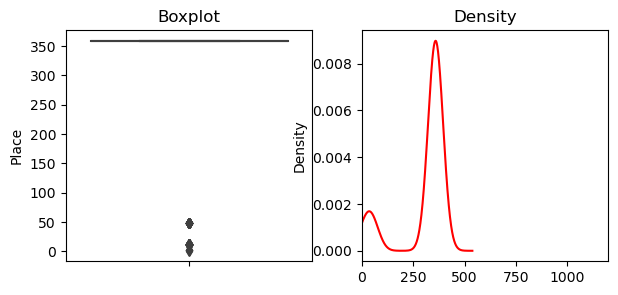

In [213]:
col = 'Place'

plt.figure(figsize=(7,3))

plt.subplot(121)
plt.title("Boxplot")
sns.boxplot(y = dataopen[col])

plt.subplot(122)
plt.title("Density")
dataopen[col].plot.density(color = 'red')
plt.xlim((0,1200))

plt.show()

Se denota para el presente dataset que los outlier de place se ubica entre 0 a 250 0 más

In [214]:
IQR = dataopen[col].quantile(0.75) - dataopen[col].quantile(0.25)
LI = dataopen[col].quantile(0.25) - 1.5*IQR
LS = dataopen[col].quantile(0.75) + 1.5*IQR

(LI, LS)

(359.0, 359.0)

En valores númericos se pueden notar que inicia entre -236217.5 hasta 454986.5

In [215]:
dataopen[col+'_capp'] =np.where(dataopen[col] >LS,LS,np.where(dataopen[col] <LI,LI,dataopen[col]))

Visualización de datos de la columna Place

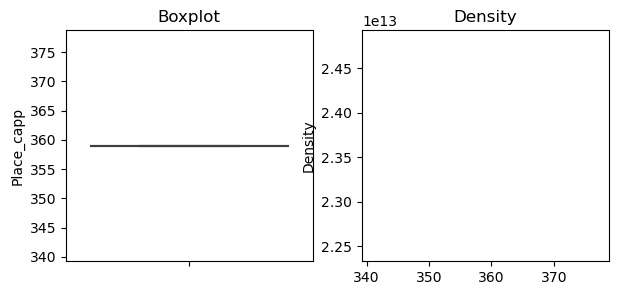

In [216]:
col = 'Place_capp'

plt.figure(figsize=(7,3))

plt.subplot(121)
plt.title("Boxplot")
sns.boxplot(y = dataopen[col])

plt.subplot(122)
plt.title("Density")
dataopen[col].plot.density(color = 'red')

plt.show()

Se utilizó el método del rango intercuartílico (IQR) para identificar outliers

Age


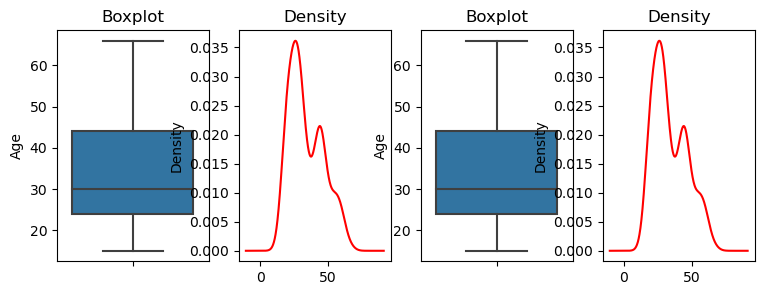

BodyweightKg


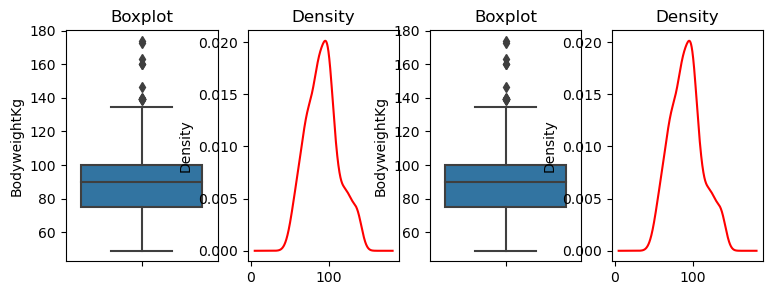

BestSquatKg


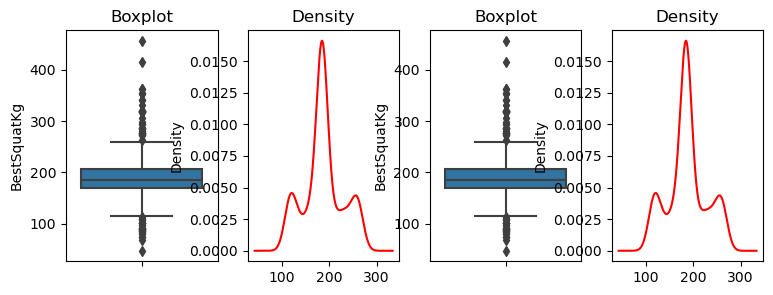

BestBenchKg


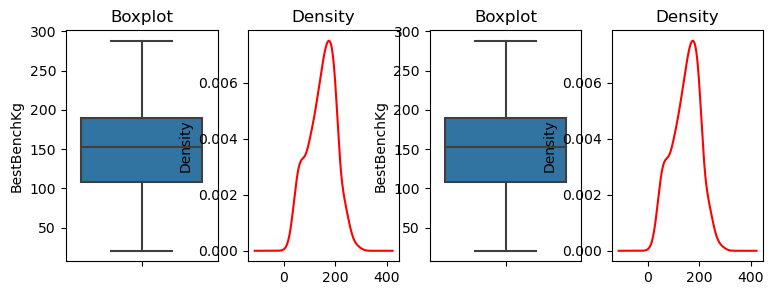

BestDeadliftKg


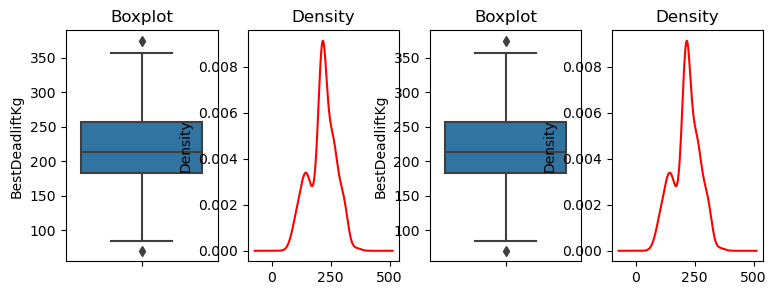

TotalKg


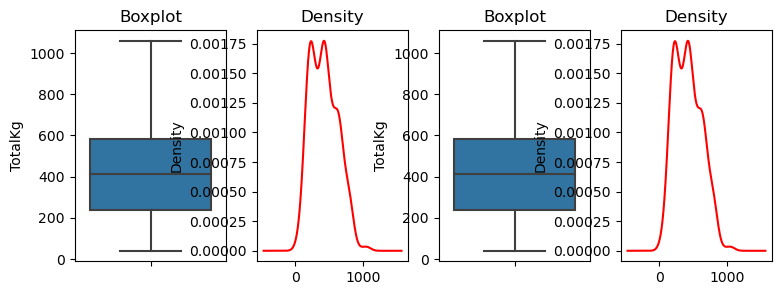

Wilks


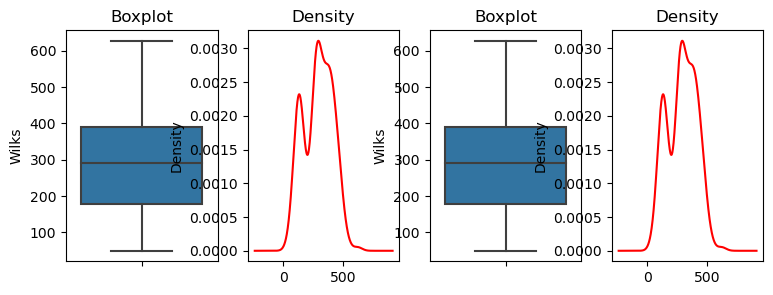

In [217]:
for col in continuas:
    IQR = dataopen[col].quantile(0.75) - dataopen[col].quantile(0.25)
    LI = dataopen[col].quantile(0.25) - 1.5*IQR
    LS = dataopen[col].quantile(0.75) + 1.5*IQR

    dataopen[col+'_capp'] =np.where(dataopen[col] >LS,LS,np.where(dataopen[col] <LI,LI,dataopen[col]))
    
    print(col)

    plt.figure(figsize=(9,3))

    plt.subplot(141)
    plt.title("Boxplot")
    sns.boxplot(y = dataopen[col])

    plt.subplot(142)
    plt.title("Density")
    dataopen[col+"_capp"].plot.density(color = 'red')

    plt.subplot(143)
    plt.title("Boxplot")
    sns.boxplot(y = dataopen[col])

    plt.subplot(144)
    plt.title("Density")
    dataopen[col+"_capp"].plot.density(color = 'red')

    plt.show()

# 4.c Transformación de variables númericas

In [218]:
import scipy.stats as stats

In [219]:
def plot_sensity_qq(df, variable):

       plt.figure(figsize=(8, 3))

       plt.subplot(121)
       df[variable].hist(bins=30)
       plt.title(variable)

       plt.subplot(122)
       stats.probplot(df[variable], dist="norm", plot=plt)
       
       plt.show()

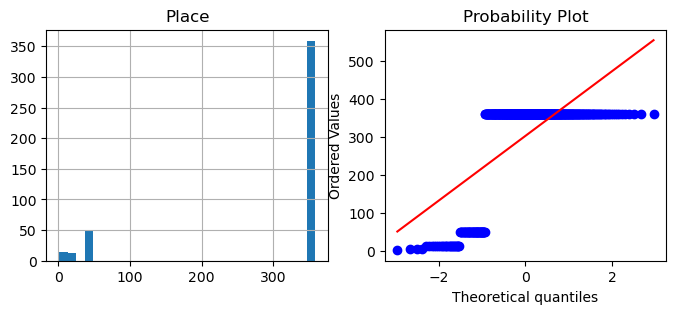

In [220]:
plot_sensity_qq(dataopen, 'Place')

In [221]:
dataopen['Place'].describe()

count    435.000000
mean     302.264368
std      123.683823
min        1.000000
25%      359.000000
50%      359.000000
75%      359.000000
max      359.000000
Name: Place, dtype: float64

Transformación logarítmica

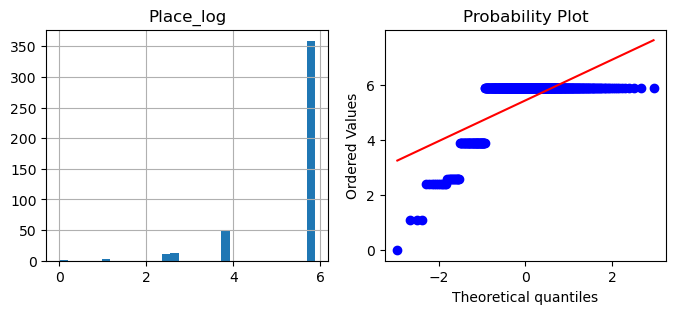

In [222]:
dataopen['Place_log'] = np.log(dataopen['Place'])
plot_sensity_qq(dataopen, 'Place_log')

# Transformación Inversa

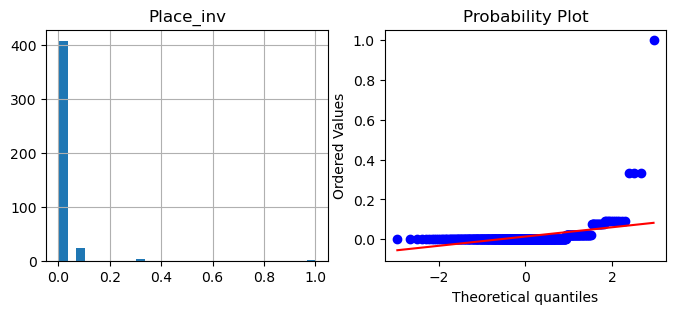

In [223]:
dataopen['Place_inv'] = 1/(dataopen['Place'])
plot_sensity_qq(dataopen,'Place_inv')

### Transformación Polinomial de Orden 2

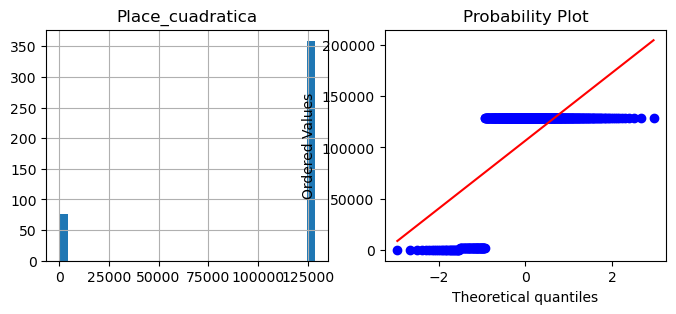

In [224]:
dataopen['Place_cuadratica'] = (dataopen['Place'])**2
plot_sensity_qq(dataopen, 'Place_cuadratica')

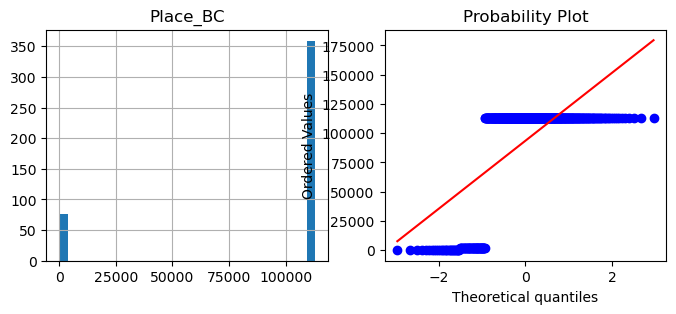

In [225]:
dataopen['Place_BC'], lmbd  = stats.boxcox(dataopen['Place'])
plot_sensity_qq(dataopen, 'Place_BC')

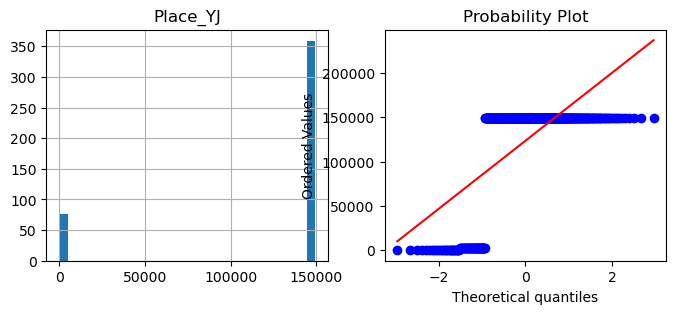

In [226]:
dataopen['Place_YJ'], lmbd  = stats.yeojohnson(dataopen['Place'])
plot_sensity_qq(dataopen, 'Place_YJ')

# Transformación para variable Name

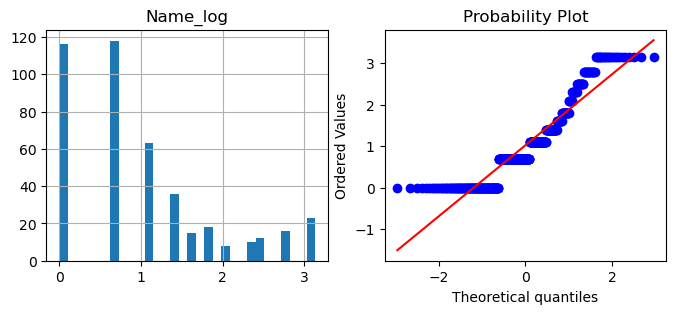

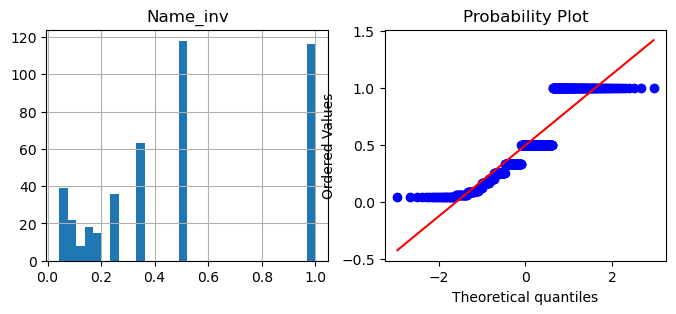

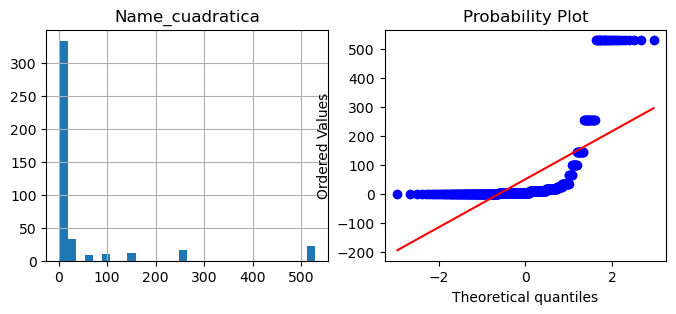

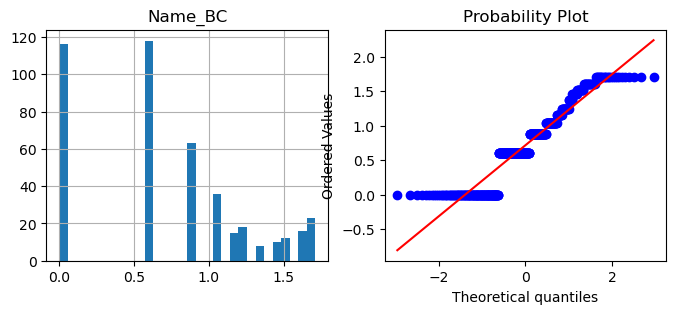

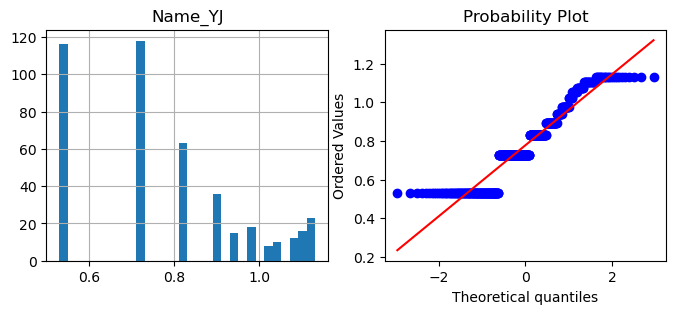

In [227]:
dataopen['Name_log'] = np.log(dataopen['Name'])
plot_sensity_qq(dataopen, 'Name_log')

dataopen['Name_inv'] = 1/(dataopen['Name'])
plot_sensity_qq(dataopen,'Name_inv')

dataopen['Name_cuadratica'] = (dataopen['Name'])**2
plot_sensity_qq(dataopen, 'Name_cuadratica')

dataopen['Name_BC'], lmbd  = stats.boxcox(dataopen['Name'])
plot_sensity_qq(dataopen, 'Name_BC')

dataopen['Name_YJ'], lmbd  = stats.yeojohnson(dataopen['Name'])
plot_sensity_qq(dataopen, 'Name_YJ')

# Transformación para variable Age

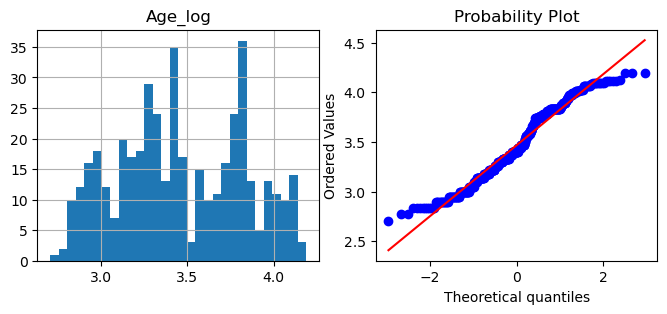

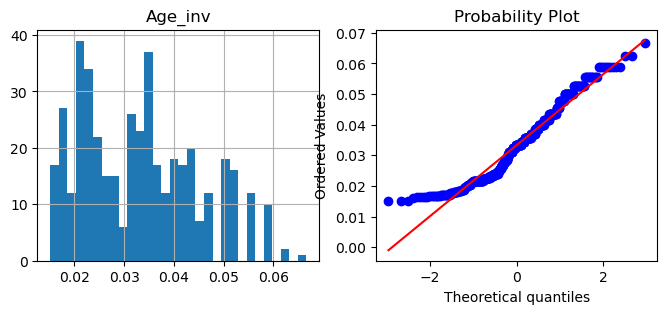

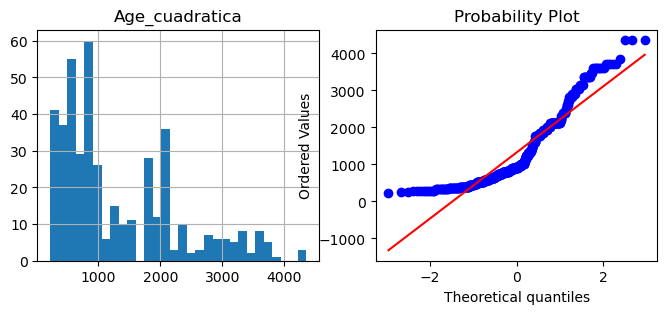

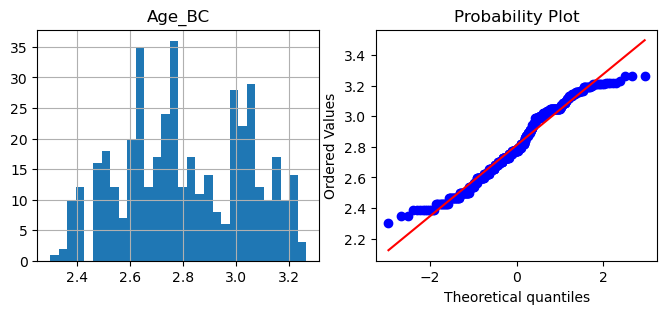

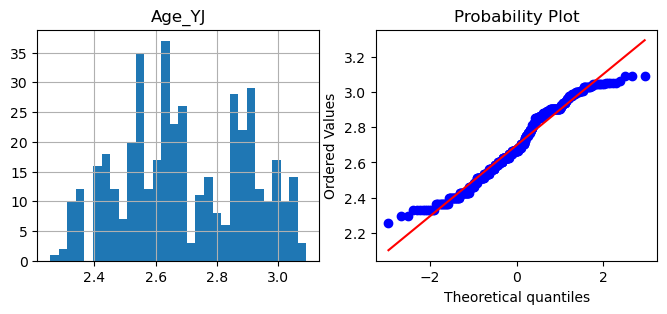

In [228]:
dataopen['Age_log'] = np.log(dataopen['Age'])
plot_sensity_qq(dataopen, 'Age_log')

dataopen['Age_inv'] = 1/(dataopen['Age'])
plot_sensity_qq(dataopen,'Age_inv')

dataopen['Age_cuadratica'] = (dataopen['Age'])**2
plot_sensity_qq(dataopen, 'Age_cuadratica')

dataopen['Age_BC'], lmbd  = stats.boxcox(dataopen['Age'])
plot_sensity_qq(dataopen, 'Age_BC')

dataopen['Age_YJ'], lmbd  = stats.yeojohnson(dataopen['Age'])
plot_sensity_qq(dataopen, 'Age_YJ')

# Transformación para variable Division

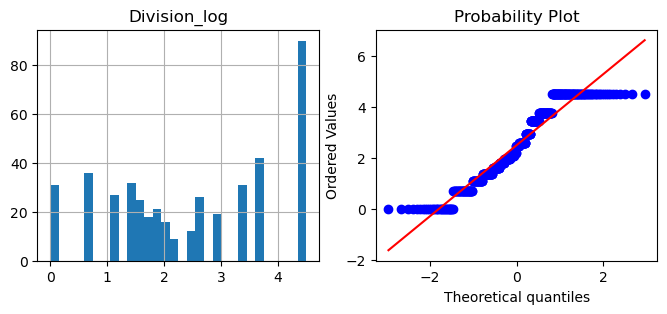

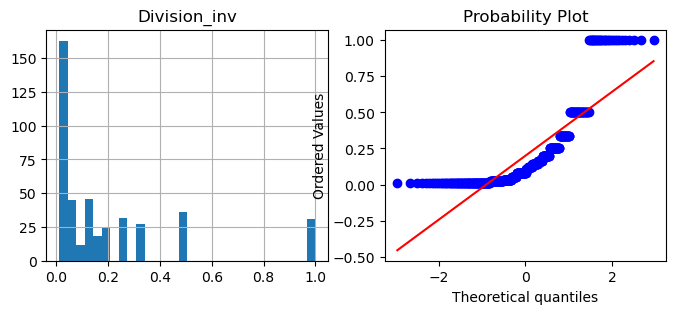

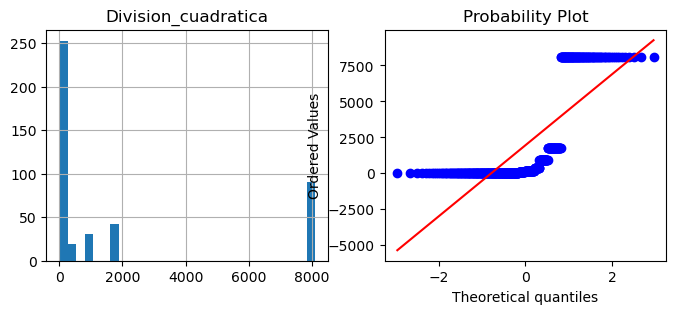

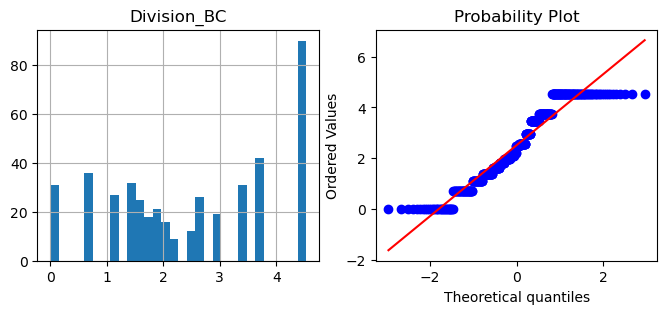

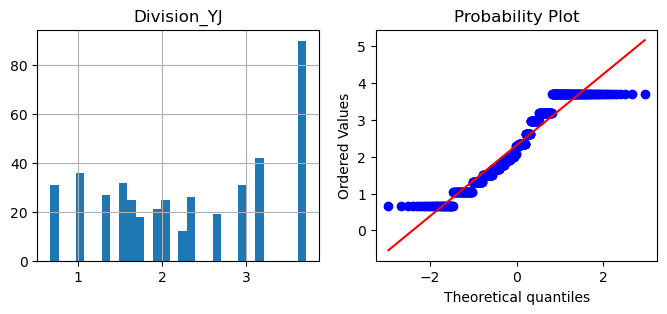

In [229]:
dataopen['Division_log'] = np.log(dataopen['Division'])
plot_sensity_qq(dataopen, 'Division_log')

dataopen['Division_inv'] = 1/(dataopen['Division'])
plot_sensity_qq(dataopen,'Division_inv')

dataopen['Division_cuadratica'] = (dataopen['Division'])**2
plot_sensity_qq(dataopen, 'Division_cuadratica')

dataopen['Division_BC'], lmbd  = stats.boxcox(dataopen['Division'])
plot_sensity_qq(dataopen, 'Division_BC')

dataopen['Division_YJ'], lmbd  = stats.yeojohnson(dataopen['Division'])
plot_sensity_qq(dataopen, 'Division_YJ')

# Transformación para variable BodyweightKg

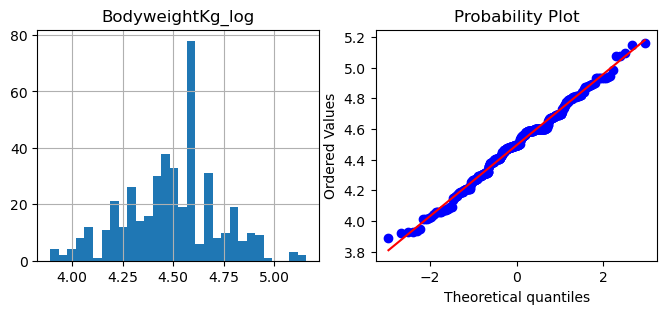

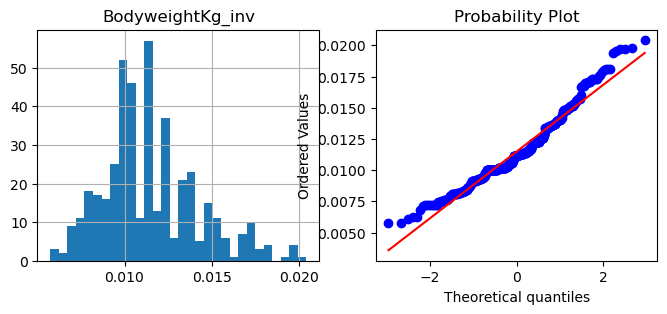

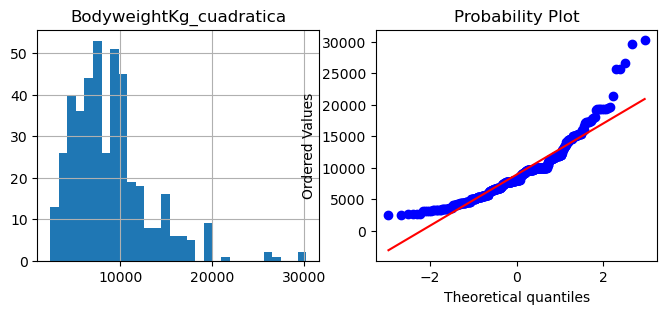

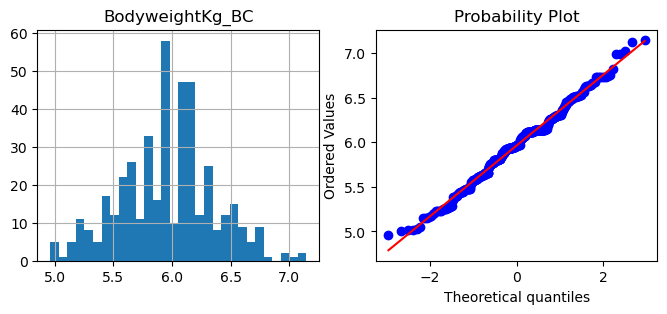

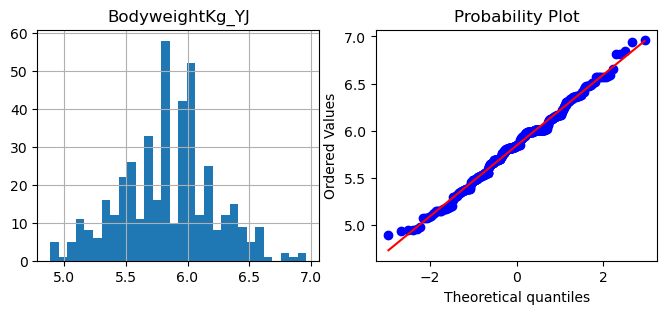

In [230]:
dataopen['BodyweightKg_log'] = np.log(dataopen['BodyweightKg'])
plot_sensity_qq(dataopen, 'BodyweightKg_log')

dataopen['BodyweightKg_inv'] = 1/(dataopen['BodyweightKg'])
plot_sensity_qq(dataopen,'BodyweightKg_inv')

dataopen['BodyweightKg_cuadratica'] = (dataopen['BodyweightKg'])**2
plot_sensity_qq(dataopen, 'BodyweightKg_cuadratica')

dataopen['BodyweightKg_BC'], lmbd  = stats.boxcox(dataopen['BodyweightKg'])
plot_sensity_qq(dataopen, 'BodyweightKg_BC')

dataopen['BodyweightKg_YJ'], lmbd  = stats.yeojohnson(dataopen['BodyweightKg'])
plot_sensity_qq(dataopen, 'BodyweightKg_YJ')

# Transformación para variable WeightClassKg

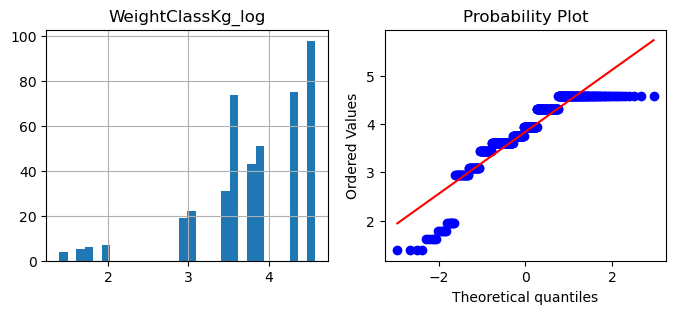

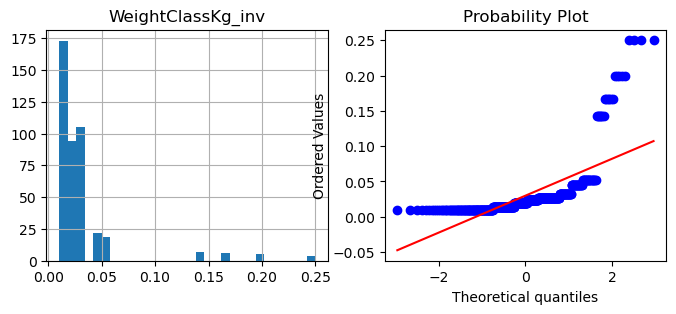

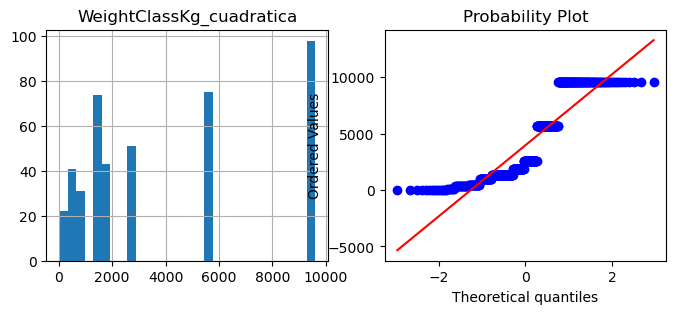

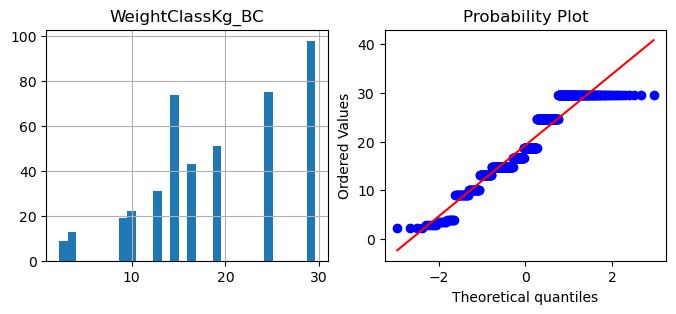

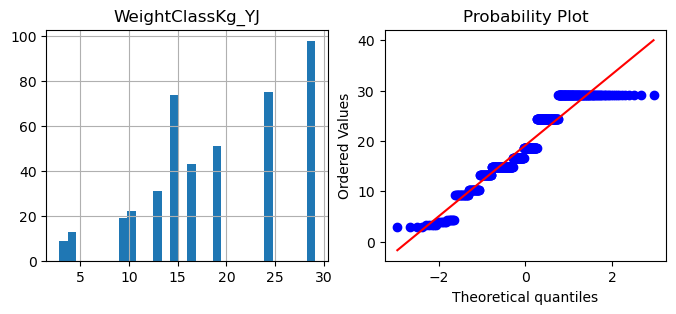

In [231]:
dataopen['WeightClassKg_log'] = np.log(dataopen['WeightClassKg'])
plot_sensity_qq(dataopen, 'WeightClassKg_log')

dataopen['WeightClassKg_inv'] = 1/(dataopen['WeightClassKg'])
plot_sensity_qq(dataopen,'WeightClassKg_inv')

dataopen['WeightClassKg_cuadratica'] = (dataopen['WeightClassKg'])**2
plot_sensity_qq(dataopen, 'WeightClassKg_cuadratica')

dataopen['WeightClassKg_BC'], lmbd  = stats.boxcox(dataopen['WeightClassKg'])
plot_sensity_qq(dataopen, 'WeightClassKg_BC')

dataopen['WeightClassKg_YJ'], lmbd  = stats.yeojohnson(dataopen['WeightClassKg'])
plot_sensity_qq(dataopen, 'WeightClassKg_YJ')

# Transformación para variable BestSquatKg

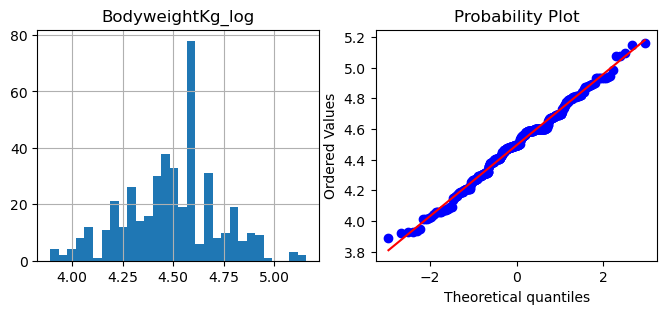

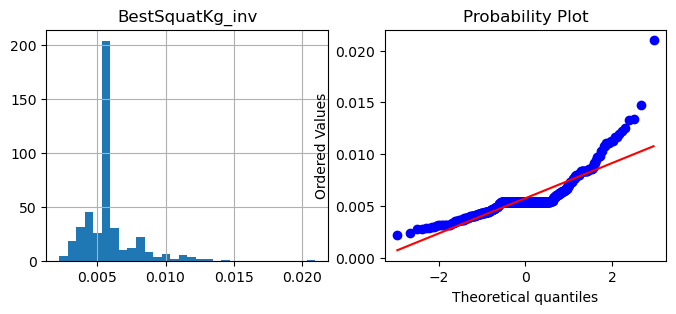

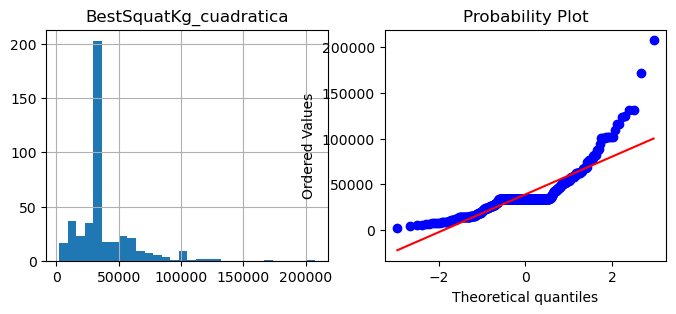

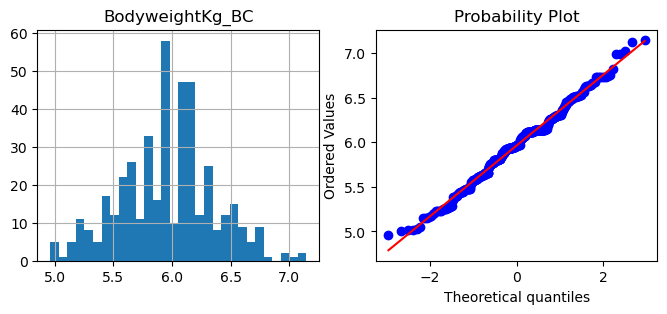

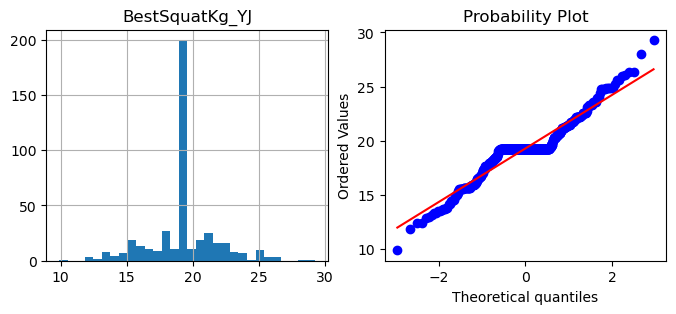

In [232]:
dataopen['BestSquatKg_log'] = np.log(dataopen['BestSquatKg'])
plot_sensity_qq(dataopen, 'BodyweightKg_log')

dataopen['BestSquatKg_inv'] = 1/(dataopen['BestSquatKg'])
plot_sensity_qq(dataopen,'BestSquatKg_inv')

dataopen['BestSquatKg_cuadratica'] = (dataopen['BestSquatKg'])**2
plot_sensity_qq(dataopen, 'BestSquatKg_cuadratica')

dataopen['BestSquatKg_BC'], lmbd  = stats.boxcox(dataopen['BestSquatKg'])
plot_sensity_qq(dataopen, 'BodyweightKg_BC')

dataopen['BestSquatKg_YJ'], lmbd  = stats.yeojohnson(dataopen['BestSquatKg'])
plot_sensity_qq(dataopen, 'BestSquatKg_YJ')

# Transformación para variable BestBenchKg

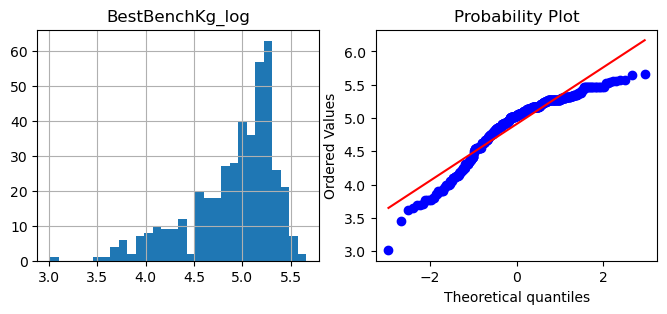

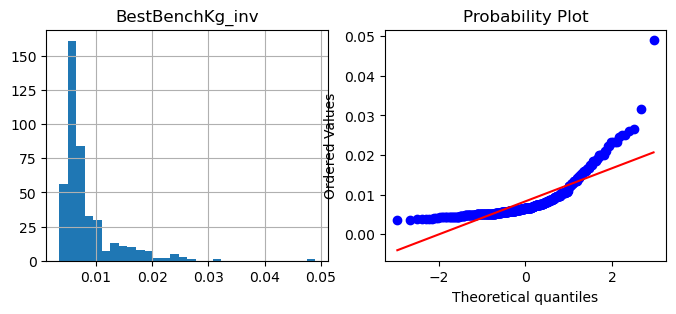

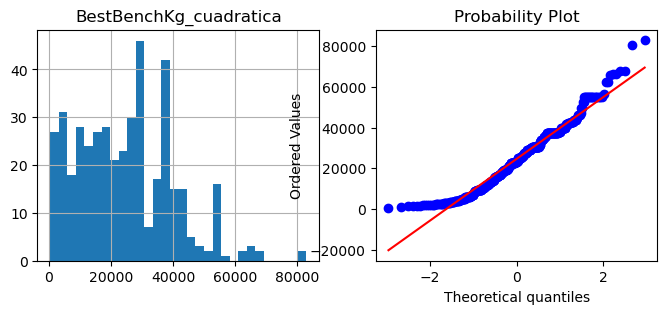

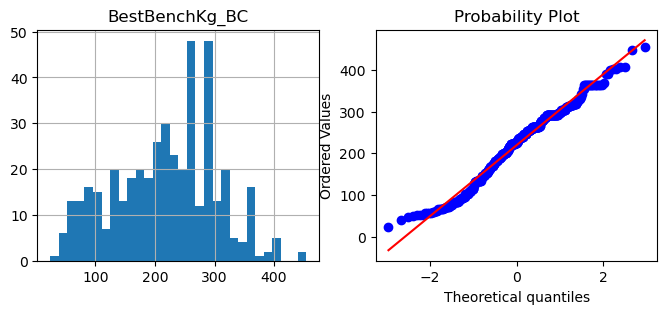

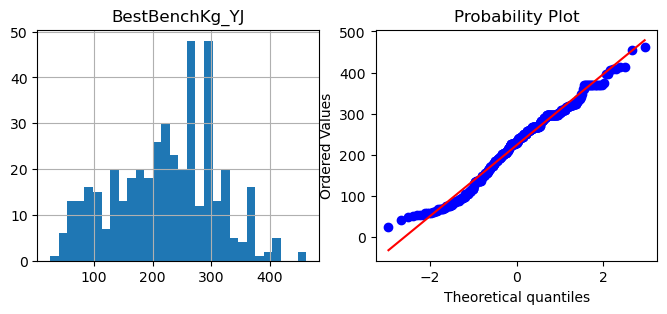

In [233]:
dataopen['BestBenchKg_log'] = np.log(dataopen['BestBenchKg'])
plot_sensity_qq(dataopen, 'BestBenchKg_log')

dataopen['BestBenchKg_inv'] = 1/(dataopen['BestBenchKg'])
plot_sensity_qq(dataopen,'BestBenchKg_inv')

dataopen['BestBenchKg_cuadratica'] = (dataopen['BestBenchKg'])**2
plot_sensity_qq(dataopen, 'BestBenchKg_cuadratica')

dataopen['BestBenchKg_BC'], lmbd  = stats.boxcox(dataopen['BestBenchKg'])
plot_sensity_qq(dataopen, 'BestBenchKg_BC')

dataopen['BestBenchKg_YJ'], lmbd  = stats.yeojohnson(dataopen['BestBenchKg'])
plot_sensity_qq(dataopen, 'BestBenchKg_YJ')

# Transformación para variable BestDeadliftKg

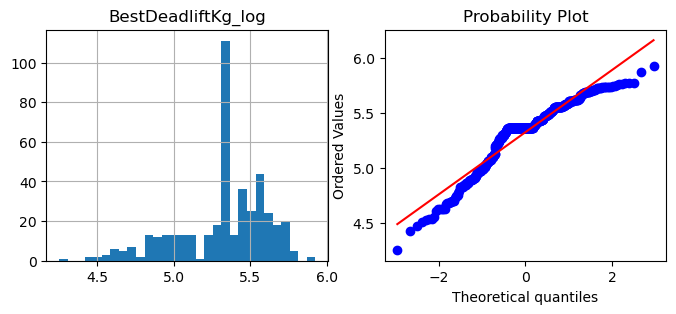

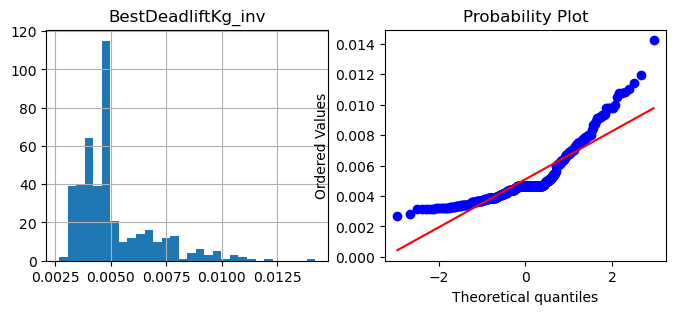

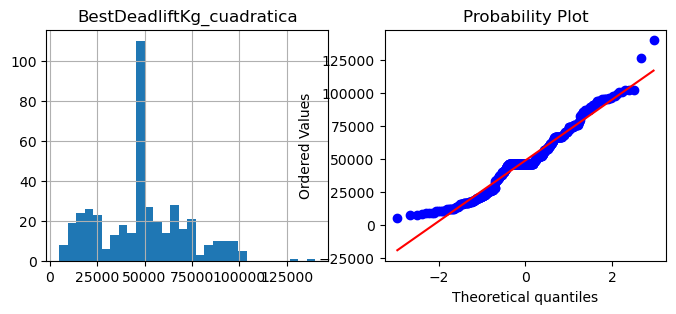

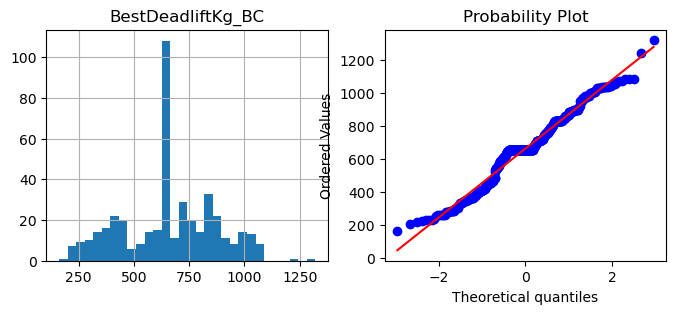

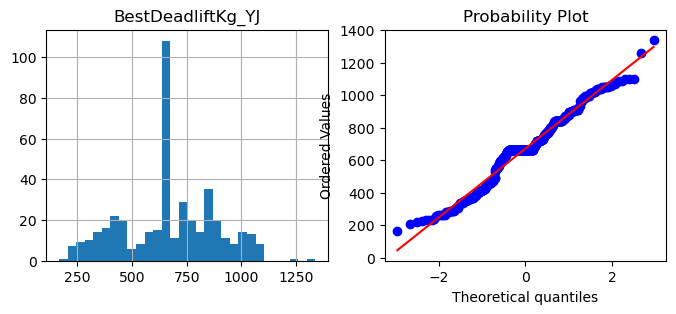

In [234]:
dataopen['BestDeadliftKg_log'] = np.log(dataopen['BestDeadliftKg'])
plot_sensity_qq(dataopen, 'BestDeadliftKg_log')

dataopen['BestDeadliftKg_inv'] = 1/(dataopen['BestDeadliftKg'])
plot_sensity_qq(dataopen,'BestDeadliftKg_inv')

dataopen['BestDeadliftKg_cuadratica'] = (dataopen['BestDeadliftKg'])**2
plot_sensity_qq(dataopen, 'BestDeadliftKg_cuadratica')

dataopen['BestDeadliftKg_BC'], lmbd  = stats.boxcox(dataopen['BestDeadliftKg'])
plot_sensity_qq(dataopen, 'BestDeadliftKg_BC')

dataopen['BestDeadliftKg_YJ'], lmbd  = stats.yeojohnson(dataopen['BestDeadliftKg'])
plot_sensity_qq(dataopen, 'BestDeadliftKg_YJ')

# Transformación para variable TotalKg

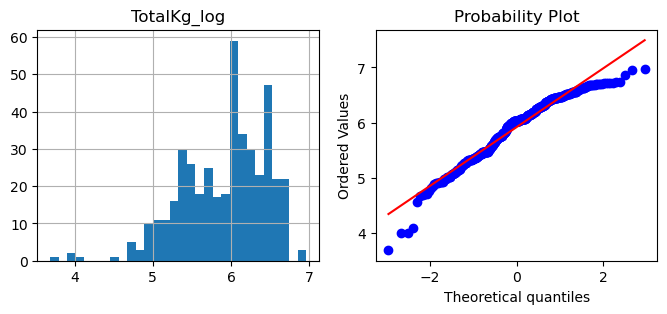

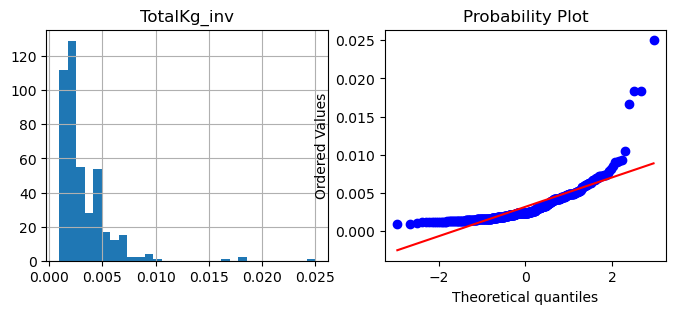

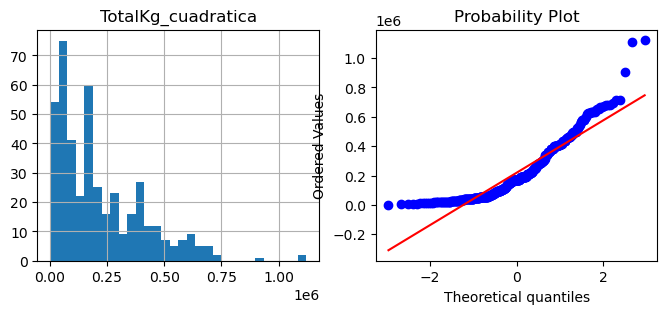

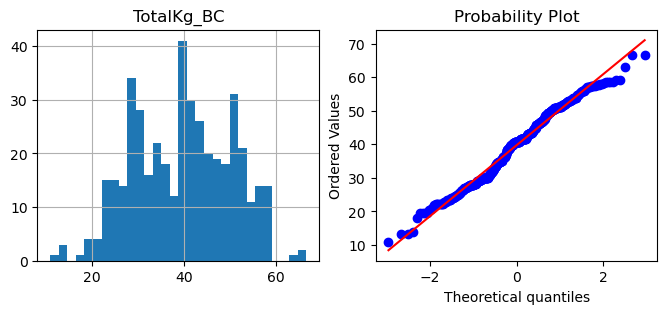

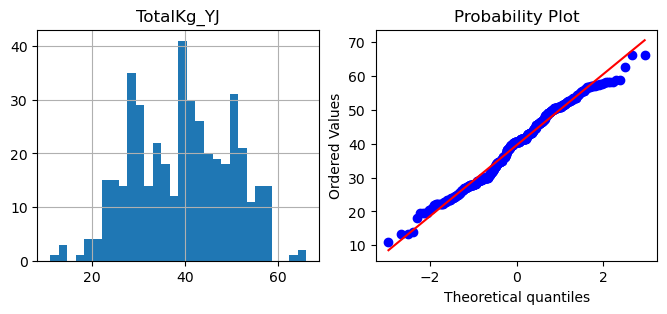

In [235]:
dataopen['TotalKg_log'] = np.log(dataopen['TotalKg'])
plot_sensity_qq(dataopen, 'TotalKg_log')

dataopen['TotalKg_inv'] = 1/(dataopen['TotalKg'])
plot_sensity_qq(dataopen,'TotalKg_inv')

dataopen['TotalKg_cuadratica'] = (dataopen['TotalKg'])**2
plot_sensity_qq(dataopen, 'TotalKg_cuadratica')

dataopen['TotalKg_BC'], lmbd  = stats.boxcox(dataopen['TotalKg'])
plot_sensity_qq(dataopen, 'TotalKg_BC')

dataopen['TotalKg_YJ'], lmbd  = stats.yeojohnson(dataopen['TotalKg'])
plot_sensity_qq(dataopen, 'TotalKg_YJ')

# Transformación para variable Wilks

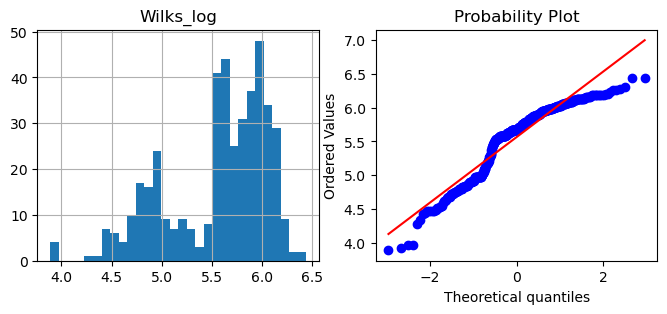

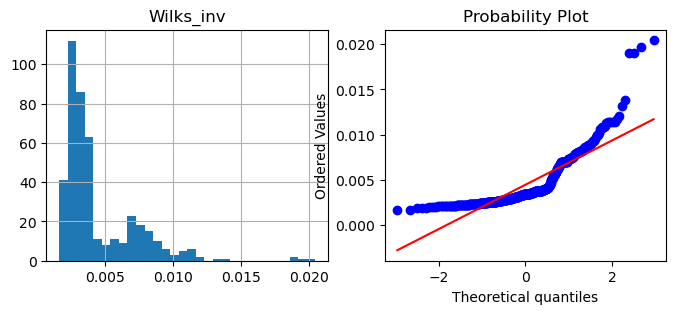

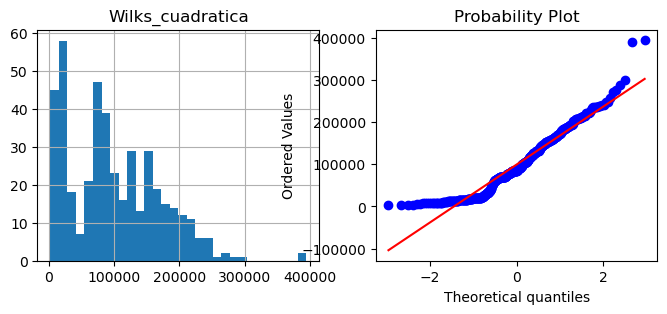

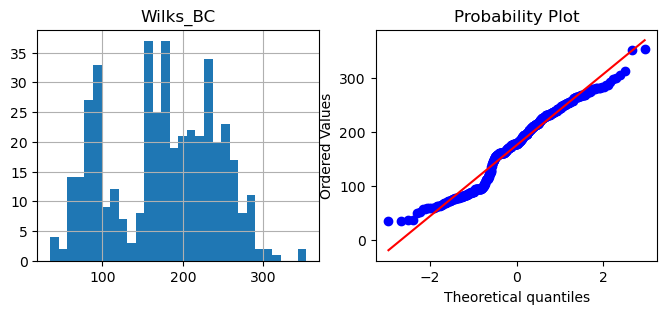

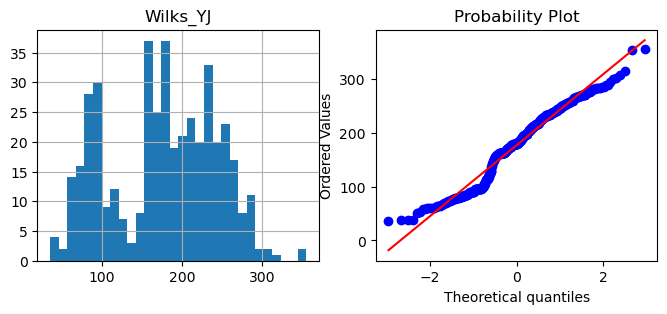

In [236]:
dataopen['Wilks_log'] = np.log(dataopen['Wilks'])
plot_sensity_qq(dataopen, 'Wilks_log')

dataopen['Wilks_inv'] = 1/(dataopen['Wilks'])
plot_sensity_qq(dataopen,'Wilks_inv')

dataopen['Wilks_cuadratica'] = (dataopen['Wilks'])**2
plot_sensity_qq(dataopen, 'Wilks_cuadratica')

dataopen['Wilks_BC'], lmbd  = stats.boxcox(dataopen['Wilks'])
plot_sensity_qq(dataopen, 'Wilks_BC')

dataopen['Wilks_YJ'], lmbd  = stats.yeojohnson(dataopen['Wilks'])
plot_sensity_qq(dataopen, 'Wilks_YJ')

### Feature Scaling

In [237]:
dataopen.head()

,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,...,TotalKg_log,TotalKg_inv,TotalKg_cuadratica,TotalKg_BC,TotalKg_YJ,Wilks_log,Wilks_inv,Wilks_cuadratica,Wilks_BC,Wilks_YJ
0,1,96,119,47,3,59.60,19,47.63,20.41,70.31,...,4.929787,0.007228,19140.7225,22.319129,22.299732,5.043748,0.006450,24040.5025,100.508103,101.378750
1,12,96,16,42,7,58.51,19,142.88,95.25,163.29,...,5.995008,0.002491,161138.0164,39.868105,39.675026,6.123326,0.002191,208282.7044,265.678587,267.148210
2,12,96,16,42,31,58.51,19,142.88,95.25,163.29,...,5.995008,0.002491,161138.0164,39.868105,39.675026,6.123326,0.002191,208282.7044,265.678587,267.148210
3,12,96,274,42,31,58.51,19,185.00,95.25,213.70,...,4.556505,0.010499,9072.5625,18.105599,18.132460,4.684813,0.009234,11726.7241,72.611089,73.408182
4,1,96,274,18,3,63.68,31,185.00,31.75,90.72,...,4.807866,0.008165,14998.9009,20.853672,20.849888,4.871143,0.007665,17022.4209,85.975729,86.806172


In [238]:
dataopen.describe()



,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,...,TotalKg_log,TotalKg_inv,TotalKg_cuadratica,TotalKg_BC,TotalKg_YJ,Wilks_log,Wilks_inv,Wilks_cuadratica,Wilks_BC,Wilks_YJ
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,...,435.000000,435.000000,4.350000e+02,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,4.508046,285.372414,207.285057,34.172414,28.894253,91.851931,55.974713,189.774851,147.498552,213.697241,...,5.918640,0.003179,2.190434e+05,39.740496,39.548711,5.564179,0.004434,99264.272855,175.820743,176.958230
std,5.560045,100.890958,90.911521,12.461745,33.521200,21.385345,28.866797,53.474421,53.209876,55.689187,...,0.542812,0.002348,1.900979e+05,10.650162,10.544725,0.506549,0.002828,70690.029610,66.714752,66.947841
min,1.000000,96.000000,16.000000,15.000000,1.000000,48.990000,4.000000,47.630000,20.410000,70.310000,...,3.688879,0.000944,1.600000e+03,10.923945,11.049307,3.889573,0.001593,2390.232100,35.094924,35.830026
25%,1.000000,339.000000,119.000000,24.000000,4.000000,74.885000,37.000000,170.050000,108.180000,183.100000,...,5.464877,0.001716,5.581562e+04,29.948111,29.851695,5.173944,0.002559,31191.092100,113.053451,113.961436
50%,2.000000,339.000000,274.000000,30.000000,12.000000,89.810000,51.000000,185.000000,152.500000,213.700000,...,6.028279,0.002410,1.722250e+05,40.584818,40.384758,5.674560,0.003432,84890.649600,177.504018,178.630292
75%,4.000000,339.000000,274.000000,44.000000,42.000000,99.790000,75.000000,206.380000,190.000000,256.280000,...,6.367964,0.004233,3.397374e+05,48.643486,48.364385,5.968105,0.005662,152697.571450,231.108736,232.439168
max,23.000000,339.000000,274.000000,66.000000,90.000000,173.910000,98.000000,455.860000,288.030000,374.210000,...,6.965213,0.025000,1.121778e+06,66.689320,66.227663,6.442317,0.020454,394208.179600,353.725615,355.569579


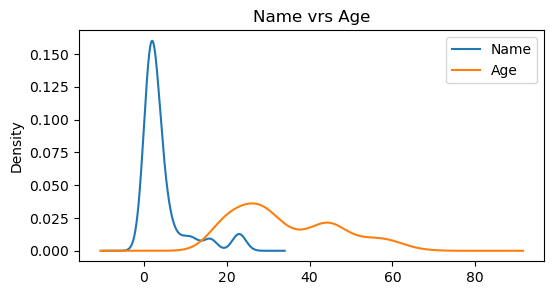

In [239]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
dataopen['Name'].plot(kind='kde', ax=ax, label='Name')
dataopen['Age'].plot(kind='kde', ax=ax, label='Age')
plt.title("Name vrs Age")

plt.legend()
plt.show()

#### Scaling para Name

In [240]:
min_lf = dataopen['Name'].min()
max_lf = dataopen['Name'].max()

dataopen['Name_minMaxScaled'] = (dataopen['Name'] - min_lf)/(max_lf - min_lf)

#### Scaling para Sex

In [241]:
min_lf = dataopen['Sex'].min()
max_lf = dataopen['Sex'].max()

dataopen['Sex_minMaxScaled'] = (dataopen['Sex'] - min_lf)/(max_lf - min_lf)

#### Scaling para Equipment

In [242]:
min_lf = dataopen['Equipment'].min()
max_lf = dataopen['Equipment'].max()

dataopen['Equipment_minMaxScaled'] = (dataopen['Equipment'] - min_lf)/(max_lf - min_lf)

#### Scaling para Age

In [243]:
min_lf = dataopen['Age'].min()
max_lf = dataopen['Age'].max()

dataopen['Age_minMaxScaled'] = (dataopen['Age'] - min_lf)/(max_lf - min_lf)

#### Scaling para Division

In [244]:
min_lf = dataopen['Division'].min()
max_lf = dataopen['Division'].max()

dataopen['Division_minMaxScaled'] = (dataopen['Division'] - min_lf)/(max_lf - min_lf)

### Scaling para BodyweightKg

In [245]:
min_lf = dataopen['BodyweightKg'].min()
max_lf = dataopen['BodyweightKg'].max()

dataopen['BodyweightKg_minMaxScaled'] = (dataopen['BodyweightKg'] - min_lf)/(max_lf - min_lf)

### Scaling para WeightClassKg

In [246]:
min_lf = dataopen['WeightClassKg'].min()
max_lf = dataopen['WeightClassKg'].max()

dataopen['WeightClassKg_minMaxScaled'] = (dataopen['WeightClassKg'] - min_lf)/(max_lf - min_lf)

### Scaling para BestSquatKg

In [247]:
min_lf = dataopen['BestSquatKg'].min()
max_lf = dataopen['BestSquatKg'].max()

dataopen['BestSquatKg_minMaxScaled'] = (dataopen['BestSquatKg'] - min_lf)/(max_lf - min_lf)

### Scaling para BestBenchKg

In [248]:
min_lf = dataopen['BestBenchKg'].min()
max_lf = dataopen['BestBenchKg'].max()

dataopen['BestBenchKg_minMaxScaled'] = (dataopen['BestBenchKg'] - min_lf)/(max_lf - min_lf)

### Scaling para BestDeadliftKg

In [249]:
min_lf = dataopen['BestDeadliftKg'].min()
max_lf = dataopen['BestDeadliftKg'].max()

dataopen['BestDeadliftKg_minMaxScaled'] = (dataopen['BestDeadliftKg'] - min_lf)/(max_lf - min_lf)

## Resultado después de aplicación de Scaling

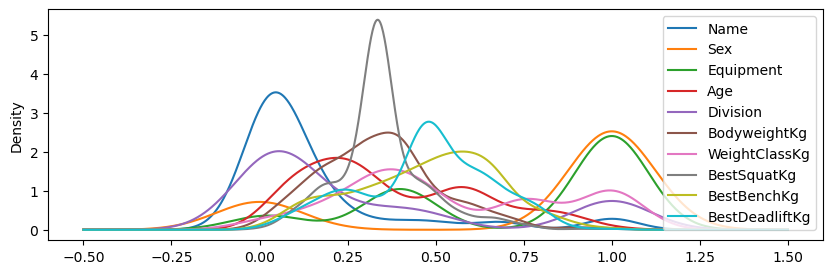

In [250]:
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot(111)

dataopen['Name_minMaxScaled'].plot(kind='kde', ax=ax, label='Name')
dataopen['Sex_minMaxScaled'].plot(kind='kde', ax=ax, label='Sex')
dataopen['Equipment_minMaxScaled'].plot(kind='kde', ax=ax, label='Equipment')
dataopen['Age_minMaxScaled'].plot(kind='kde', ax=ax, label='Age')
dataopen['Division_minMaxScaled'].plot(kind='kde', ax=ax, label='Division')
dataopen['BodyweightKg_minMaxScaled'].plot(kind='kde', ax=ax, label='BodyweightKg')
dataopen['WeightClassKg_minMaxScaled'].plot(kind='kde', ax=ax, label='WeightClassKg')
dataopen['BestSquatKg_minMaxScaled'].plot(kind='kde', ax=ax, label='BestSquatKg')
dataopen['BestBenchKg_minMaxScaled'].plot(kind='kde', ax=ax, label='BestBenchKg')
dataopen['BestDeadliftKg_minMaxScaled'].plot(kind='kde', ax=ax, label='BestDeadliftKg')

plt.legend()
plt.show()

# Resultado con un diagrama de Dispersión

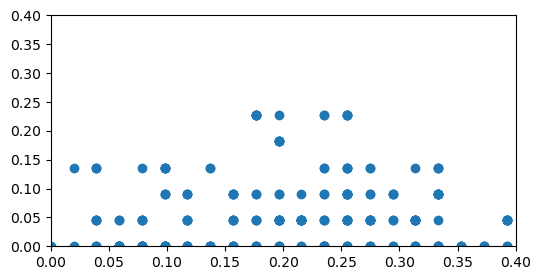

In [251]:
fig = plt.figure(figsize=(6, 3))

plt.scatter(x=dataopen['Age_minMaxScaled'], y=dataopen['Name_minMaxScaled'])
plt.xlim([0,0.4])
plt.ylim([0,0.4])
plt.show()

In [252]:
dataopen.dtypes

Name                             int64
Sex                              int64
Equipment                        int64
Age                              int64
Division                         int64
                                ...   
BodyweightKg_minMaxScaled      float64
WeightClassKg_minMaxScaled     float64
BestSquatKg_minMaxScaled       float64
BestBenchKg_minMaxScaled       float64
BestDeadliftKg_minMaxScaled    float64
Length: 86, dtype: object

In [253]:
dataopen['BodyweightKg'].fillna(median_BodyweightKg, inplace=True)

In [254]:
dataopen.head()

,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,...,Name_minMaxScaled,Sex_minMaxScaled,Equipment_minMaxScaled,Age_minMaxScaled,Division_minMaxScaled,BodyweightKg_minMaxScaled,WeightClassKg_minMaxScaled,BestSquatKg_minMaxScaled,BestBenchKg_minMaxScaled,BestDeadliftKg_minMaxScaled
0,1,96,119,47,3,59.60,19,47.63,20.41,70.31,...,0.0,0.0,0.399225,0.627451,0.022472,0.084934,0.159574,0.000000,0.000000,0.000000
1,12,96,16,42,7,58.51,19,142.88,95.25,163.29,...,0.5,0.0,0.000000,0.529412,0.067416,0.076209,0.159574,0.233324,0.279650,0.305956
2,12,96,16,42,31,58.51,19,142.88,95.25,163.29,...,0.5,0.0,0.000000,0.529412,0.337079,0.076209,0.159574,0.233324,0.279650,0.305956
3,12,96,274,42,31,58.51,19,185.00,95.25,213.70,...,0.5,0.0,1.000000,0.529412,0.337079,0.076209,0.159574,0.336501,0.279650,0.471833
4,1,96,274,18,3,63.68,31,185.00,31.75,90.72,...,0.0,0.0,1.000000,0.058824,0.022472,0.117595,0.287234,0.336501,0.042374,0.067160


In [255]:
# Guardar el DataFrame en un archivo Excel
dataopen.to_excel('Data.xlsx', index=False)

In [256]:
# Guardar el DataFrame en un archivo Excel
dataopen.to_csv('Data1.csv', index=False)

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

In [258]:
#Librerías para ML
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score

In [259]:
dataopen.head()

,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,...,Name_minMaxScaled,Sex_minMaxScaled,Equipment_minMaxScaled,Age_minMaxScaled,Division_minMaxScaled,BodyweightKg_minMaxScaled,WeightClassKg_minMaxScaled,BestSquatKg_minMaxScaled,BestBenchKg_minMaxScaled,BestDeadliftKg_minMaxScaled
0,1,96,119,47,3,59.60,19,47.63,20.41,70.31,...,0.0,0.0,0.399225,0.627451,0.022472,0.084934,0.159574,0.000000,0.000000,0.000000
1,12,96,16,42,7,58.51,19,142.88,95.25,163.29,...,0.5,0.0,0.000000,0.529412,0.067416,0.076209,0.159574,0.233324,0.279650,0.305956
2,12,96,16,42,31,58.51,19,142.88,95.25,163.29,...,0.5,0.0,0.000000,0.529412,0.337079,0.076209,0.159574,0.233324,0.279650,0.305956
3,12,96,274,42,31,58.51,19,185.00,95.25,213.70,...,0.5,0.0,1.000000,0.529412,0.337079,0.076209,0.159574,0.336501,0.279650,0.471833
4,1,96,274,18,3,63.68,31,185.00,31.75,90.72,...,0.0,0.0,1.000000,0.058824,0.022472,0.117595,0.287234,0.336501,0.042374,0.067160


In [260]:
from openpyxl.styles import Font

In [261]:
dataml = pd.read_csv("Data1.csv")
dataml.head()

,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,...,Name_minMaxScaled,Sex_minMaxScaled,Equipment_minMaxScaled,Age_minMaxScaled,Division_minMaxScaled,BodyweightKg_minMaxScaled,WeightClassKg_minMaxScaled,BestSquatKg_minMaxScaled,BestBenchKg_minMaxScaled,BestDeadliftKg_minMaxScaled
0,1,96,119,47,3,59.60,19,47.63,20.41,70.31,...,0.0,0.0,0.399225,0.627451,0.022472,0.084934,0.159574,0.000000,0.000000,0.000000
1,12,96,16,42,7,58.51,19,142.88,95.25,163.29,...,0.5,0.0,0.000000,0.529412,0.067416,0.076209,0.159574,0.233324,0.279650,0.305956
2,12,96,16,42,31,58.51,19,142.88,95.25,163.29,...,0.5,0.0,0.000000,0.529412,0.337079,0.076209,0.159574,0.233324,0.279650,0.305956
3,12,96,274,42,31,58.51,19,185.00,95.25,213.70,...,0.5,0.0,1.000000,0.529412,0.337079,0.076209,0.159574,0.336501,0.279650,0.471833
4,1,96,274,18,3,63.68,31,185.00,31.75,90.72,...,0.0,0.0,1.000000,0.058824,0.022472,0.117595,0.287234,0.336501,0.042374,0.067160


Análisis de Variables categóricas y discretas Vrs Target

Se analizan las variables categóricas y discretas para verificar el impacto que genera cada valor dentro de la variable sobre el target.

-------------------Name


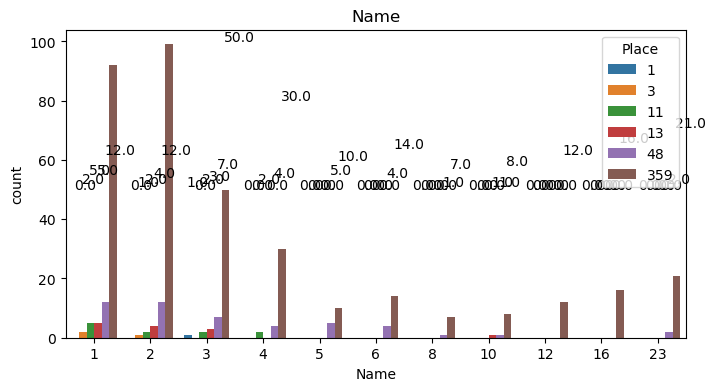

-------------------Sex


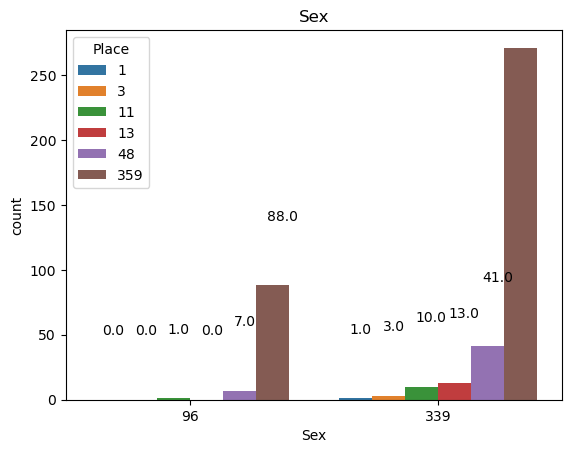

-------------------Equipment


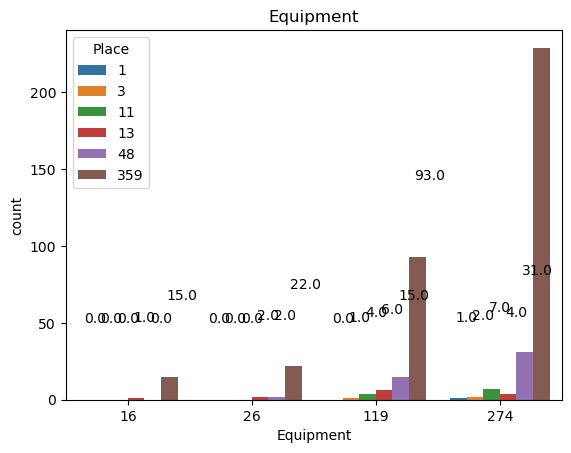

-------------------Division


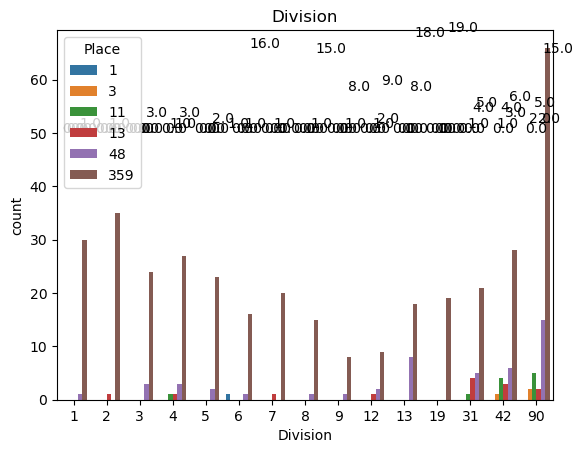

-------------------WeightClassKg


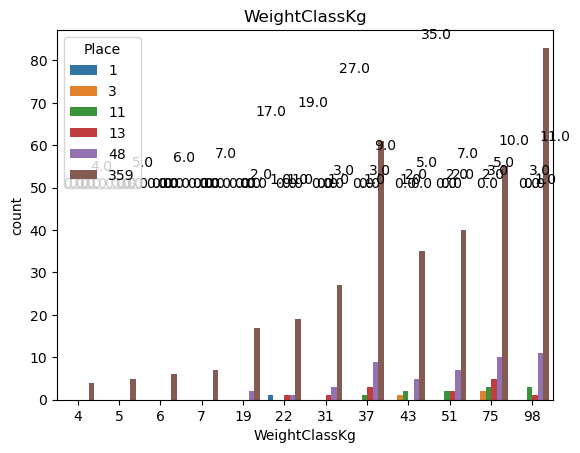

-------------------Place


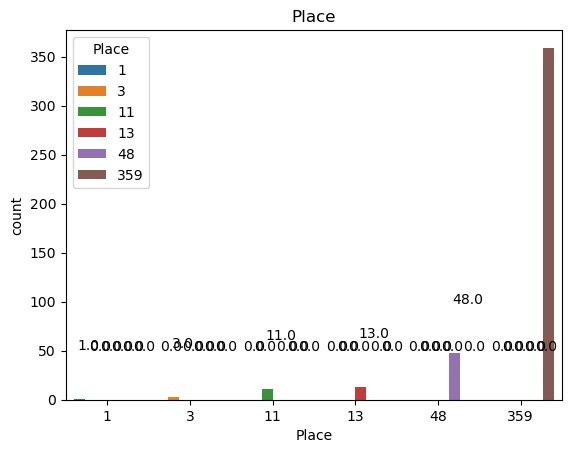

In [262]:
plt.figure(figsize=(8, 4))

for colName in categoricas:
    plot=sns.countplot(x=dataml[colName], hue=dataml['Place'])
    plt.title(colName)
    print("-------------------" + colName)
    for p in plot.patches:
        plot.annotate(p.get_height(),(p.get_x() + p.get_width()/3, p.get_height() + 50))
    plt.show()

Selección de variables features y target

In [263]:
X=dataml[['BodyweightKg','BestBenchKg']]
y=dataml['Place']

Partición de datos para prueba y entrenamiento

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024, shuffle=True)

In [265]:
std_scaler= StandardScaler()
std_scaler.fit(X_train)

X_std_train= std_scaler.transform(X_train)
X_std_test= std_scaler.transform(X_test) # evitamos fuga de datos entre train y test

In [266]:
X_combinde_std = np.vstack((X_std_train, X_std_test))
y_combinde= np.hstack([y_train, y_test])

Modelo SVM

In [267]:
from sklearn.svm import SVC #Support Vector Classifier

In [268]:
svm= SVC(kernel='linear', C=1.0)
svm.fit(X_std_train, y_train) # entrenamiento del modelo.

SVC(kernel='linear')

In [269]:
svm_preds = svm.predict(X_std_test)
svm_preds

array([359, 359, 359, 359, 359, 359, 359, 359, 359, 359, 359, 359, 359,
       359, 359, 359, 359, 359, 359, 359, 359, 359, 359, 359, 359, 359,
       359, 359, 359, 359, 359, 359, 359, 359, 359, 359, 359, 359, 359,
       359, 359, 359, 359, 359, 359, 359, 359, 359, 359, 359, 359, 359,
       359, 359, 359, 359, 359, 359, 359, 359, 359, 359, 359, 359, 359,
       359, 359, 359, 359, 359, 359, 359, 359, 359, 359, 359, 359, 359,
       359, 359, 359, 359, 359, 359, 359, 359, 359, 359, 359, 359, 359,
       359, 359, 359, 359, 359, 359, 359, 359, 359, 359, 359, 359, 359,
       359, 359, 359, 359, 359, 359, 359, 359, 359, 359, 359, 359, 359,
       359, 359, 359, 359, 359, 359, 359, 359, 359, 359, 359, 359, 359,
       359], dtype=int64)

In [270]:
np.array(y_test)

array([359, 359, 359, 359, 359, 359, 359,  48, 359, 359,  48, 359, 359,
       359, 359,  11, 359, 359, 359, 359, 359, 359, 359,  48, 359, 359,
       359, 359, 359, 359, 359,  48, 359, 359, 359,  13, 359, 359, 359,
       359, 359, 359, 359, 359, 359, 359, 359, 359, 359, 359, 359, 359,
        11, 359, 359, 359, 359, 359, 359,  48, 359, 359, 359, 359, 359,
       359,  48, 359, 359, 359, 359, 359, 359,  48,  48, 359, 359, 359,
       359, 359,   3, 359, 359, 359, 359, 359, 359, 359, 359, 359, 359,
       359, 359, 359,  13, 359,  48, 359, 359,  13, 359, 359, 359,  48,
       359, 359, 359, 359, 359, 359, 359, 359, 359, 359, 359, 359, 359,
       359,  13, 359, 359, 359,  48, 359, 359,  48, 359, 359,  48, 359,
       359], dtype=int64)

In [271]:
print("Accuracy:",accuracy_score(y_test, svm_preds))

Accuracy: 0.8473282442748091


## Gráficas de Regiones de Predicción

In [272]:
from plotting_decision_boundaries import plotting_db

c:\Users\DELL LATITUDE\Desktop\Fase 2 SL\plotting_decision_boundaries.py:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == item, 0], y=X[y == item, 1],alpha=0.8, c=colors[index], s=50, edgecolor='k',


IndexError: tuple index out of range

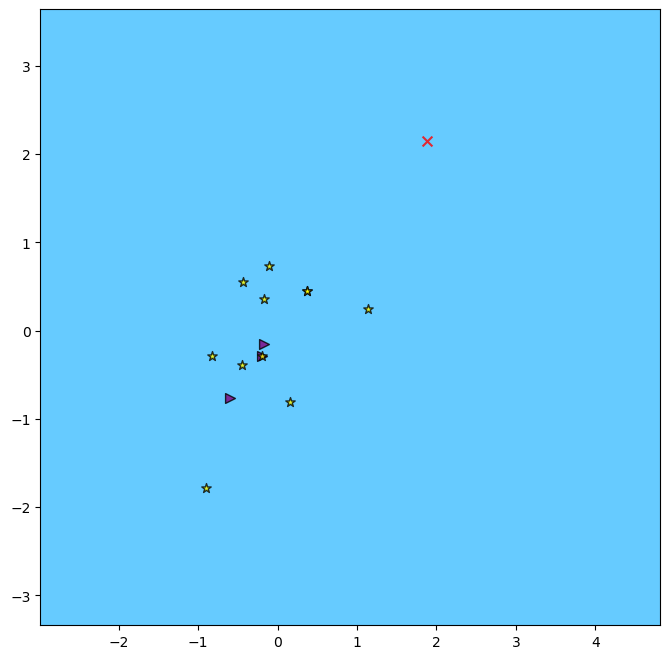

In [394]:
plotting_db(X=X_combinde_std, y=y_combinde, classifier = svm)

c:\Users\DELL LATITUDE\Desktop\Fase 2 SL\plotting_decision_boundaries.py:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == item, 0], y=X[y == item, 1],alpha=0.8, c=colors[index], s=50, edgecolor='k',


IndexError: tuple index out of range

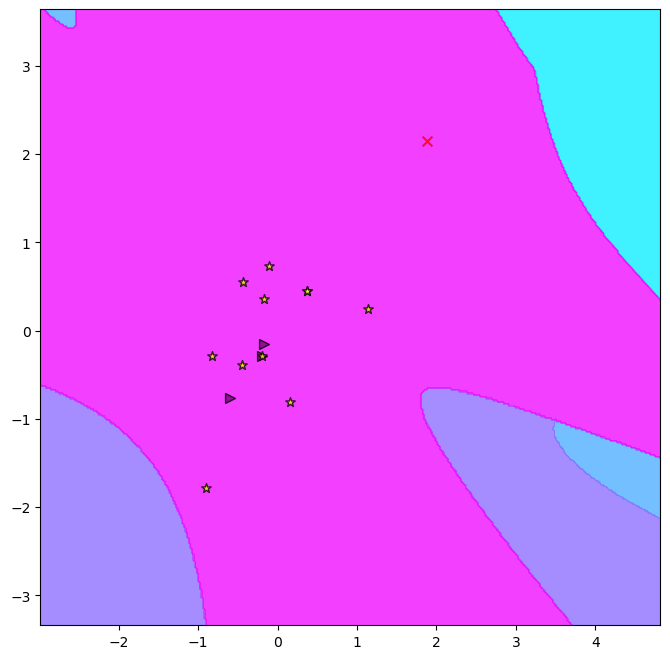

In [395]:
smv_sigmoid=SVC(kernel='sigmoid',C=1.0)
smv_sigmoid.fit(X_std_train, y_train)
plotting_db(X=X_combinde_std,y=y_combinde, classifier=smv_sigmoid)

c:\Users\DELL LATITUDE\Desktop\Fase 2 SL\plotting_decision_boundaries.py:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == item, 0], y=X[y == item, 1],alpha=0.8, c=colors[index], s=50, edgecolor='k',


IndexError: tuple index out of range

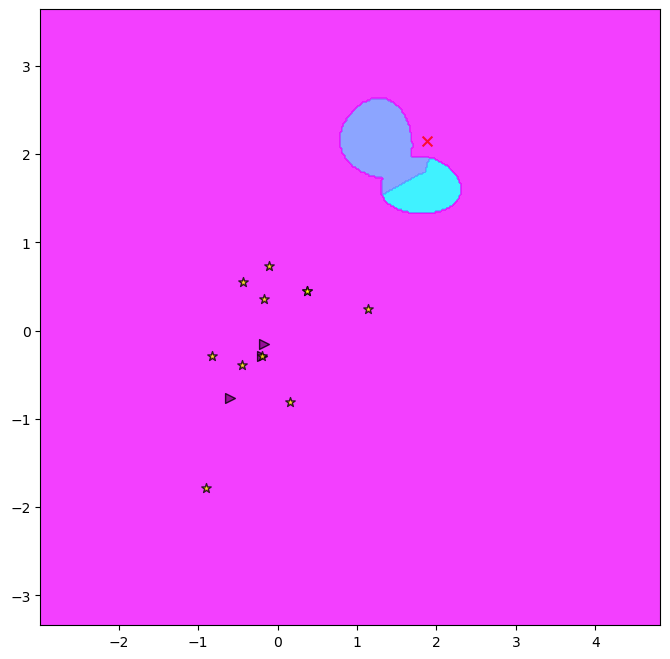

In [396]:
smv_rbf=SVC(kernel='rbf',C=200)
smv_rbf.fit(X_std_train, y_train)
plotting_db(X=X_combinde_std,y=y_combinde, classifier=smv_rbf)

In [397]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataml['Place']= encoder.fit_transform(dataml['Place'])

In [398]:
# Features Store
dataml.to_csv("Data_Features_V1.csv", index=False)

In [399]:
dataml.head()

,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,...,Name_minMaxScaled,Sex_minMaxScaled,Equipment_minMaxScaled,Age_minMaxScaled,Division_minMaxScaled,BodyweightKg_minMaxScaled,WeightClassKg_minMaxScaled,BestSquatKg_minMaxScaled,BestBenchKg_minMaxScaled,BestDeadliftKg_minMaxScaled
0,1,96,119,47,3,59.60,19,47.63,20.41,70.31,...,0.0,0.0,0.399225,0.627451,0.022472,0.084934,0.159574,0.000000,0.000000,0.000000
1,12,96,16,42,7,58.51,19,142.88,95.25,163.29,...,0.5,0.0,0.000000,0.529412,0.067416,0.076209,0.159574,0.233324,0.279650,0.305956
2,12,96,16,42,31,58.51,19,142.88,95.25,163.29,...,0.5,0.0,0.000000,0.529412,0.337079,0.076209,0.159574,0.233324,0.279650,0.305956
3,12,96,274,42,31,58.51,19,185.00,95.25,213.70,...,0.5,0.0,1.000000,0.529412,0.337079,0.076209,0.159574,0.336501,0.279650,0.471833
4,1,96,274,18,3,63.68,31,185.00,31.75,90.72,...,0.0,0.0,1.000000,0.058824,0.022472,0.117595,0.287234,0.336501,0.042374,0.067160


In [400]:
#Features Store
dataml.to_csv("Data_features_V1.csv", index= False)

## Construcción de Modelos

In [401]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#metricas
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

#gestion de train_test
from sklearn.model_selection import train_test_split

#transformaciones
from sklearn.preprocessing import MinMaxScaler


In [402]:
datamodel = pd.read_csv("Data_features_V1.csv")
datamodel.head()

,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,...,Name_minMaxScaled,Sex_minMaxScaled,Equipment_minMaxScaled,Age_minMaxScaled,Division_minMaxScaled,BodyweightKg_minMaxScaled,WeightClassKg_minMaxScaled,BestSquatKg_minMaxScaled,BestBenchKg_minMaxScaled,BestDeadliftKg_minMaxScaled
0,1,96,119,47,3,59.60,19,47.63,20.41,70.31,...,0.0,0.0,0.399225,0.627451,0.022472,0.084934,0.159574,0.000000,0.000000,0.000000
1,12,96,16,42,7,58.51,19,142.88,95.25,163.29,...,0.5,0.0,0.000000,0.529412,0.067416,0.076209,0.159574,0.233324,0.279650,0.305956
2,12,96,16,42,31,58.51,19,142.88,95.25,163.29,...,0.5,0.0,0.000000,0.529412,0.337079,0.076209,0.159574,0.233324,0.279650,0.305956
3,12,96,274,42,31,58.51,19,185.00,95.25,213.70,...,0.5,0.0,1.000000,0.529412,0.337079,0.076209,0.159574,0.336501,0.279650,0.471833
4,1,96,274,18,3,63.68,31,185.00,31.75,90.72,...,0.0,0.0,1.000000,0.058824,0.022472,0.117595,0.287234,0.336501,0.042374,0.067160


## Selección de target y features

In [403]:
X = datamodel.drop('Place', axis=1) # Features - lo que se va a utilizar para predecir
y = datamodel['Place'] # Target - lo que que voy a predecir

In [404]:
## Split para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2025, shuffle=True)

In [405]:
# Creamos y aplicamos escalado de datos
scaler = MinMaxScaler()

scaler.fit(X_train) # calculamos el scaler

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [406]:
X_train.head()

,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,...,Name_minMaxScaled,Sex_minMaxScaled,Equipment_minMaxScaled,Age_minMaxScaled,Division_minMaxScaled,BodyweightKg_minMaxScaled,WeightClassKg_minMaxScaled,BestSquatKg_minMaxScaled,BestBenchKg_minMaxScaled,BestDeadliftKg_minMaxScaled
116,2,339,274,28,90,99.34,98,185.00,193.15,265.00,...,0.045455,1.0,1.000000,0.254902,1.000000,0.403058,1.000000,0.336501,0.645467,0.640638
312,8,96,274,61,1,67.40,31,135.00,102.50,160.00,...,0.318182,0.0,1.000000,0.901961,0.000000,0.147374,0.287234,0.214022,0.306741,0.295130
275,5,339,119,42,6,81.83,43,231.33,147.42,238.14,...,0.181818,1.0,0.399225,0.529412,0.056180,0.262888,0.414894,0.449991,0.474591,0.552254
270,23,339,119,45,42,94.80,98,226.80,165.56,249.48,...,1.000000,1.0,0.399225,0.588235,0.460674,0.366715,1.000000,0.438895,0.542374,0.589569
143,3,96,274,56,1,85.50,75,68.04,43.09,102.06,...,0.090909,0.0,1.000000,0.803922,0.000000,0.292267,0.755319,0.049996,0.084747,0.104475


# 1.a Naive Bayes

In [407]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)

nb_predicts = nb_classifier.predict(X_test_scaled)

acc = accuracy_score(nb_predicts, y_test)
print ("Acurracy:", acc)

Acurracy: 0.9847328244274809


# 1.C. Regresión logística

In [408]:
logit = LogisticRegression()
logit.fit(X_train_scaled, y_train) # entrenamiento del modelo

logit_predicts= logit.predict(X_test_scaled)
acc = accuracy_score(logit_predicts, y_test)
print ("Accuracy:", acc)

Accuracy: 0.9465648854961832


# 1.f RandomForest

In [409]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_scaled, y_train)

rf_predicts = rf_classifier.predict(X_test_scaled)

acc = accuracy_score(rf_predicts, y_test)
print("Accuracy:", acc)

Accuracy: 0.9847328244274809


In [410]:
from sklearn.model_selection import GridSearchCV

In [419]:
hyper_parameters ={
    "n_estimators":[10,50,100,500,1000],
    "criterion":['gini','entropy'],
    "max_depth":[10,20]
}
rf_classifier = RandomForestClassifier()

#Configuraicón de optimización de hyper_parámetros.
rf_hyp_opt = GridSearchCV(estimator=rf_classifier, param_grid = hyper_parameters, cv=10, scoring= "roc_auc")

#Entrenamiento del modelo
rf_hyp_opt.fit(X_train_scaled, y_train)

c:\Users\DELL LATITUDE\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\DELL LATITUDE\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\DELL LATITUDE\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\DELL LATITUDE\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\DELL 

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20],
                         'n_estimators': [10, 50, 100, 500, 1000]},
             scoring='roc_auc')

In [420]:
# socre del mejor modelo
rf_hyp_opt.best_score_

nan

In [421]:
# socre del mejor modelo
rf_hyp_opt.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 10}

In [422]:
# socre del mejor modelo
rf_hyp_opt.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=10)

In [423]:
pd.DataFrame(rf_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]

,rank_test_score,params,mean_test_score,std_test_score
0,1,"{'criterion': 'gini', 'max_depth': 10, 'n_esti...",NaN,NaN
17,1,"{'criterion': 'entropy', 'max_depth': 20, 'n_e...",NaN,NaN
16,1,"{'criterion': 'entropy', 'max_depth': 20, 'n_e...",NaN,NaN
15,1,"{'criterion': 'entropy', 'max_depth': 20, 'n_e...",NaN,NaN
14,1,"{'criterion': 'entropy', 'max_depth': 10, 'n_e...",NaN,NaN
13,1,"{'criterion': 'entropy', 'max_depth': 10, 'n_e...",NaN,NaN
12,1,"{'criterion': 'entropy', 'max_depth': 10, 'n_e...",NaN,NaN
11,1,"{'criterion': 'entropy', 'max_depth': 10, 'n_e...",NaN,NaN
10,1,"{'criterion': 'entropy', 'max_depth': 10, 'n_e...",NaN,NaN
9,1,"{'criterion': 'gini', 'max_depth': 20, 'n_esti...",NaN,NaN


Resultados de Optimazacion de Hiperparametros

In [424]:
hyp_opt_scores = pd.DataFrame(rf_hyp_opt.cv_results_)
hyp_opt_scores = sort_index("rank_test_score", ascending=True)

NameError: name 'sort_index' is not defined

# 4.3.3 - Registro del Modelo

In [427]:
rf_v1 = RandomForestClassifier(criterion='entropy', max_depth=20,n_estimators=1000)

rf_v1.fit(X_train_scaled, y_train)

rf_v1_predicts = rf_v1_predicts(X_test_scaled)

roc_auc = Accuracy(rf_v1_predicts, y_test)
print("Accuracy:", cc)

NameError: name 'rf_v1_predicts' is not defined

In [428]:
modelo_final= RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=1000)

X_scaled =scaler.transform(X)
modelo_final.fit(X_scaled, y)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=1000)